## Market Basket Segmentation (Cyprus Restaurant)

### This notebook uses the AsianRestaurant_Cyprus_2018.txt dataset

<div class="alert alert-block alert-info">

# Index
    
[1. Dataset description](#1)<br>
[2. Import libraries](#2)<br>
[3. Data Understanding](#3)<br>
- [3.1 Describe Data](#3.1)<br>
- [3.2 Explore Data](#3.2)<br>  
- [3.3 Verify Data Quality](#3.3)<br>

[4. Data Preparation](#4)<br>
[5. Modelling](#5)<br>
- [5.1 Big Family Comparison](#5.1)<br>
  - [5.1.1 Apply the APRIORI to Delivery Clients ](#5.1.1)<br>
  - [5.1.2 Apply the APRIORI to Restaurant Clients ](#5.1.2)<br>  
    
- [5.2 Product Family Comparison](#5.2)<br>
  - [5.2.1 Apply the APRIORI to Delivery Clients ](#5.2.1)<br>
  - [5.2.2 Apply the APRIORI to Restaurant Clients ](#5.2.2)<br> 
    
- [5.3 Product Designation Comparison](#5.3)<br>
  - [5.3.1 Apply the APRIORI to Delivery Clients](#5.3.1)<br> 
  - [5.3.2 Apply the APRIORI algorithm to Restaurant Clients ](#5.3.2)<br> 
  - [5.3.3 Apply the APRIORI algorithm to Valentines day Clients ](#5.3.3)<br> 
    
- [5.4 Other Analysis](#5.4)<br>  
 - [5.4.1 Lunch Time Clients and Product Designation](#5.4.1)<br> 
 - [5.4.2 Dinner Time Clients and Product Designation](#5.4.2)<br>     
 - [5.4.3 Wednesdays, Fridays, Saturdays Clients and Product Designation](#5.4.3)<br> 
 - [5.4.4 Mondays, Tuesdays, Thursdays, Sundays Clients and Product Designation](#5.4.4)<br> 


</div>

<a class="anchor" id="1">

# 1. Dataset description
    
</a>

This dataset comprises data from all sales transactions made in one
of the most popular restaurants of the chain in Nicosia, the capital
of Cyprus. The dataset includes information about the items,
including quantities and prices, as well as some customer details.

Each row in the dataset represents a document line (invoice line).

- **DocNumber:** categorical - number of the document (The document number repeats in as many rows as the rows in the original document (invoice)
- **ProductDesignation:** categorical - Product designation
- **ProductFamily:** categorical -  name of the family of the product. A product can only be member of one only family
- **Qty:** numerical -  quantity asked for this product
- **DocIDHash:** numerical -  customer’s personal document identification number (Must be unique)
- **TotalAmount:** numerical -  sale price of the total quantity
- **InvoiceDateHour:** date -  date and hour when the document was issued
- **EmployeeID:** categorical - : ID of the employee who issued the document
- **IsDelivery:** categorical - : indication if sale was a delivery or a dine-inn (1:delivery, 0: dine-inn)
- **Pax:** numerical - :number of persons at the table
- **CustomerID:** categorical - : ID of the customer (if a customer record was assigned to the sale)
- **CustomerCity:** categorical - : city of the customer (usually only employed in delivery)
- **CustomerSince:** date - : date of creation of the customer




<a class="anchor" id="2">

# 2. Import libraries
    
</a>

In [66]:
# Import packages
import csv
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import plotly.express as px
import plotly.graph_objects as go
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx

<a class="anchor" id="3">

# 3. Data Understanding
    
</a>

<a class="anchor" id="3.1">

## 3.1 Describe Data
    
</a>

In [67]:
# Load data 
dataset = pd.read_csv('AsianRestaurant_Cyprus_2018.txt', sep=";")
dataset.head(5)

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
0,TKD0320000012018,1/2 DUCK,STARTERS,1.0,"27,10",2018-01-01 19:12:12.000,2,1,1,53908,LEYKOSIA,NaN
1,TKD0320000012018,SPRING ROLL,STARTERS,8.0,"17,60",2018-01-01 19:12:12.000,2,1,1,53908,LEYKOSIA,NaN
2,TKD0320000012018,SWEET SOUR CHICKEN,MEAT,2.0,"20,20",2018-01-01 19:12:12.000,2,1,1,53908,LEYKOSIA,NaN
3,TKD0320000012018,LEMON CHICKEN,MEAT,1.0,"10,10",2018-01-01 19:12:12.000,2,1,1,53908,LEYKOSIA,NaN
4,TKD0320000012018,BEEF BBS,SIZZLING,1.0,"12,60",2018-01-01 19:12:12.000,2,1,1,53908,LEYKOSIA,NaN


In [68]:
#Shape
dataset.shape

(84109, 12)

In [69]:
#Information about columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84109 entries, 0 to 84108
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DocNumber           84109 non-null  object 
 1   ProductDesignation  84109 non-null  object 
 2   ProductFamily       84109 non-null  object 
 3   Qty                 84109 non-null  float64
 4   TotalAmount         84109 non-null  object 
 5   InvoiceDateHour     84109 non-null  object 
 6   EmployeeID          84109 non-null  int64  
 7   IsDelivery          84109 non-null  int64  
 8   Pax                 84109 non-null  int64  
 9   CustomerID          84109 non-null  int64  
 10  CustomerCity        31248 non-null  object 
 11  CustomerSince       29142 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 7.7+ MB


In [70]:
#Statistics and describe the dataset
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DocNumber,84109,11147,TK0110053522018,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductDesignation,84109,255,MINERAL WATER 1.5LT,7061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductFamily,84109,27,STARTERS,14148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Qty,84109.0,NaN,NaN,NaN,1.261256,0.92378,1.0,1.0,1.0,1.0,53.0
TotalAmount,84109,374,"3,00",9733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceDateHour,84109,11146,2018-12-24 22:59:54.000,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,84109.0,NaN,NaN,NaN,3.591221,3.682017,2.0,2.0,2.0,5.0,27.0
IsDelivery,84109.0,NaN,NaN,NaN,0.371518,0.483213,0.0,0.0,0.0,1.0,1.0
Pax,84109.0,NaN,NaN,NaN,3.3008,3.693792,0.0,1.0,2.0,4.0,200.0
CustomerID,84109.0,NaN,NaN,NaN,12633.06576,21952.076038,0.0,0.0,0.0,16429.0,69101.0


In [71]:
#Check missing values
dataset.isna().sum()

DocNumber                 0
ProductDesignation        0
ProductFamily             0
Qty                       0
TotalAmount               0
InvoiceDateHour           0
EmployeeID                0
IsDelivery                0
Pax                       0
CustomerID                0
CustomerCity          52861
CustomerSince         54967
dtype: int64


<a class="anchor" id="3.2">

## 3.2 Explore Data
    
</a>

#### Doc Number

In [72]:
# Invoice Number unique. There are 11147 transactions
len(dataset['DocNumber'].unique())

11147

#### QTY (Quantity)

In [73]:
# Number of quantity asked for some kind of product
dataset['Qty'].unique().T

array([ 1.,  8.,  2.,  4.,  3.,  7.,  5.,  6., 11., 10., 15.,  9., 12.,
       14., 17., 20., 23., 21., 18., 25., 26., 19., 13., 53.])

In [74]:
dataset['Qty'].value_counts()

Qty
1.0     72407
2.0      7458
3.0      1723
4.0      1270
5.0       414
6.0       401
7.0       125
8.0       122
10.0       62
9.0        51
12.0       20
11.0       18
15.0       11
14.0       10
20.0        4
18.0        4
13.0        2
17.0        1
23.0        1
21.0        1
25.0        1
26.0        1
19.0        1
53.0        1
Name: count, dtype: int64

In [75]:
#Box Plots for the variable 'Pax'
fig = px.box(dataset, x="Qty")
warnings.filterwarnings('ignore', category=DeprecationWarning)
figure = go.Figure(data=fig)
figure.show()

In [76]:
################################# ANALYZE OF THE PRODUCTS SOLD BY RESTAURANT ####################################

#### Product Family

In [77]:
products_information=['DocNumber','ProductDesignation','ProductFamily','TotalAmount','Qty']
dataset_products=dataset[products_information]

In [78]:
dataset_products

,DocNumber,ProductDesignation,ProductFamily,TotalAmount,Qty
0,TKD0320000012018,1/2 DUCK,STARTERS,"27,10",1.0
1,TKD0320000012018,SPRING ROLL,STARTERS,"17,60",8.0
2,TKD0320000012018,SWEET SOUR CHICKEN,MEAT,"20,20",2.0
3,TKD0320000012018,LEMON CHICKEN,MEAT,"10,10",1.0
4,TKD0320000012018,BEEF BBS,SIZZLING,"12,60",1.0
...,...,...,...,...,...
84104,TK0110054642018,SWEET SOUR CHICKEN,MEAT,"12,60",1.0
84105,TK0110054642018,COKE,DRINKS,"3,00",1.0
84106,TK0110054642018,EGG FRIED RICE,RICE,"6,90",1.0
84107,TK0110054642018,TOFFEE BANANA COMPLEMENTARY,DESSERT,"0,00",1.0


In [79]:
dataset['ProductFamily'].value_counts()

ProductFamily
STARTERS       14148
DRINKS         11585
RICE           10720
MEAT            8561
EXTRAS          5044
SIZZLING        5028
JAP SUSHI       3900
MAIN IND        3060
WHITE WINE      2432
DESSERT         2372
SPIRITS         2067
TSANTES         1797
BREADS IND      1741
START IND       1704
SUSHI           1487
RICE IND        1424
RED WINES       1247
HOLDS           1184
SOUPS           1181
VEG IND          902
SEAFOOD          868
VEG              461
WITH             351
ROSE WINES       339
NEW SUSHI        281
SIDE IND         162
DESSERT IND       63
Name: count, dtype: int64

In [80]:
# Check the number of categories with 'IND' in the name (Indian Food)
dataset_products[dataset_products['ProductFamily'].str.contains('IND', regex=False)]['ProductFamily'].unique()

array(['BREADS IND', 'RICE IND', 'VEG IND', 'START IND', 'MAIN IND',
       'DESSERT IND', 'SIDE IND'], dtype=object)

In [81]:
#Investigate some categories that does not look like dishes
#Investigate the category 'WITH'
dataset_products[dataset_products['ProductDesignation']==' WITH PORK']['TotalAmount'].unique()
dataset_products[dataset_products['ProductFamily']=='WITH']['ProductDesignation'].unique()

array([' WITH BEEF', ' WITH CHICKEN', ' WITH SHRIMP', ' WITH PORK'],
      dtype=object)

In [82]:
#Investigate the category 'EXTRAS'
dataset_products[dataset_products['ProductFamily']=='EXTRAS']['ProductDesignation'].unique()

array(['DELIVERY CHARGE', ' EXTRA SAUCE', ' EXTRA PANCAKES',
       ' EXTRA SALAD', 'DESSERT'], dtype=object)

In [83]:
#Investigate the category 'HOLDS'
dataset_products[dataset_products['ProductDesignation']==' NO EGG']['TotalAmount'].unique()
dataset_products[dataset_products['ProductFamily']=='HOLDS']['ProductDesignation'].unique()

array([' NO MEAT', ' NO MUSHROOMS', ' NO ONION', ' NO EGG',
       ' NO BEANSPROUTS', ' NO SAUCE', ' NO CHILLY', ' NO PRAWNS',
       ' NO PORK', ' NO BABY CORN'], dtype=object)

In [84]:
#Investigate the category 'TSANTES'
dataset_products[dataset_products['ProductFamily']=='TSANTES']['ProductDesignation'].unique()

array(['TSANTA'], dtype=object)

In [85]:
#We have 3 type of Product Family that contains the word 'SUSHI'
dataset_products[dataset_products['ProductFamily'].str.contains('SUSHI', regex=False)]['ProductFamily'].unique()

array(['JAP SUSHI', 'NEW SUSHI', 'SUSHI'], dtype=object)

In [86]:
#Check the Product Designation of each type of Sushi
dataset[dataset['ProductFamily']=='JAP SUSHI']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='NEW SUSHI']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='SUSHI']['ProductDesignation'].unique()

array(['BUFFET SUSHI'], dtype=object)

In [87]:
#See the dishes for categories 'Seafood', 'Meat', 'Veg', 'Main Ind', 'Sizzling'
dataset_products[dataset_products['ProductFamily']=='SEAFOOD']['ProductDesignation'].unique()
dataset_products[dataset_products['ProductFamily']=='MEAT']['ProductDesignation'].unique()
dataset_products[dataset_products['ProductFamily']=='MAIN IND']['ProductDesignation'].unique()
dataset_products[dataset_products['ProductFamily']=='VEG']['ProductDesignation'].unique()
dataset_products[dataset_products['ProductFamily']=='SIZZLING']['ProductDesignation'].unique()

array(['BEEF BBS', 'BEEF OYSTER SAUCE', 'PORK WITH GINGER',
       'PRAWNS OYSTER SAUCE', 'CHICKEN OYSTER SAUCE',
       'PRAWNS WITH GINGER', 'BEEF PEPPER SAUCE', 'PRAWNS BBS',
       'CHICKEN BBS', 'CURRY', 'PORK OYSTER SAUCE', 'BEEF WITH GINGER',
       'CHICKEN WITH GINGER', 'PORK BBS'], dtype=object)

#### Product Designation

In [88]:
dataset_products['ProductDesignation'].value_counts()

ProductDesignation
MINERAL WATER 1.5LT      7061
EGG FRIED RICE           4604
SPRING ROLL              4079
DELIVERY CHARGE          3892
SWEET SOUR CHICKEN       3616
                         ... 
CLASSIC ROLLS VEG           1
BABATZIM ERODIOS ROSE       1
VEUVE CLICQUOT              1
HADJIMICHALI LEFKOS         1
 NO BABY CORN               1
Name: count, Length: 255, dtype: int64

In [89]:
################################# ANALYZE BASED ON DATE ###################################

#### Invoice Date Hour

In [90]:
dataset_date=dataset.drop(columns=[ 'ProductDesignation', 'ProductFamily', 'Qty','TotalAmount',
                                  'EmployeeID', 'Pax','CustomerID', 'CustomerCity', 'CustomerSince'])
dataset_date

,DocNumber,InvoiceDateHour,IsDelivery
0,TKD0320000012018,2018-01-01 19:12:12.000,1
1,TKD0320000012018,2018-01-01 19:12:12.000,1
2,TKD0320000012018,2018-01-01 19:12:12.000,1
3,TKD0320000012018,2018-01-01 19:12:12.000,1
4,TKD0320000012018,2018-01-01 19:12:12.000,1
...,...,...,...
84104,TK0110054642018,2018-12-31 22:45:17.000,0
84105,TK0110054642018,2018-12-31 22:45:17.000,0
84106,TK0110054642018,2018-12-31 22:45:17.000,0
84107,TK0110054642018,2018-12-31 22:45:17.000,0


In [91]:
#Analyze the number of visits to the restaurant
dataset_date=dataset_date.groupby('DocNumber').agg({'InvoiceDateHour': 'first','IsDelivery':'first'})
dataset_date.reset_index(drop=False,inplace=True)
dataset_date['Date']= pd.to_datetime(dataset_date['InvoiceDateHour'])
dataset_date['Ano_Mes_Dia'] = dataset_date['InvoiceDateHour'].str.split(' ').str[0]
dataset_date['Day_of_Week']=dataset_date['Date'].dt.day_name()
dataset_date['Hour'] = dataset_date['Date'].dt.hour 
dataset_date['Frequency']=1

In [92]:
# Create a new column 'Meal' based on the hour that the invoice was created. (Lunch or Dinner)
def f(x):
    if (x > 10) and (x <= 18):
        return 'Lunch'
    elif (x > 18) and (x <= 23 ):
        return 'Dinner'
    elif (x == 0):
        return'Dinner'
dataset_date['Meal'] = dataset_date['Hour'].apply(f)

In [93]:
#Create a new dataframe to perform visuzlaization
year=dataset_date.groupby(['Ano_Mes_Dia']).sum('Frequency')
year.reset_index(drop=False,inplace=True)
#Vistis by year (2018)
fig = px.line(year, x='Ano_Mes_Dia' , y='Frequency',labels={'y': 'Number of Sales','x': 'Date'}, color_discrete_sequence=["#990000"])
figure = go.Figure(data=fig)
figure.show()

In [94]:
week=dataset_date.groupby(['Day_of_Week']).sum('Frequency')
week.reset_index(drop=False,inplace=True)
#Visits by day of week
fig = px.bar(week, x='Day_of_Week',y='Frequency',title='Frequency by Day of Week', color_discrete_sequence=["#990000"])
figure = go.Figure(data=fig)
figure.show()

#ATTENTION: THE VALENTINE´S WAS ON A WEDNESDAY THAT´S WHY IT HAS SO HIGH FREQUENCY!!!!!

In [95]:
dataset_days=dataset_date.copy()

In [96]:
dataset_days = dataset_days.drop(dataset_days[dataset_days['Ano_Mes_Dia'] == '2018-02-14'].index)

In [97]:
week=dataset_days.groupby(['Day_of_Week']).sum('Frequency')
week.reset_index(drop=False,inplace=True)
#Visits by day of week
fig = px.bar(week, x='Day_of_Week',y='Frequency',title='Frequecy by Day of Week (without Valentines day)', color_discrete_sequence=["#990000"])
figure = go.Figure(data=fig)
figure.show()


#Even Without Valentines day in dataset Wednesday have more than averge fequncy, so there might be some promotion hapening on wednesdays

In [98]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'Day_of_Week' column to categorical data type with the defined order
dataset_date['Day_of_Week'] = pd.Categorical(dataset_date['Day_of_Week'], categories=day_order, ordered=True)

# Group the data and aggregate the frequency
week_meal = dataset_date.groupby(['Day_of_Week', 'Meal'])['Frequency'].sum().reset_index()

# Plot the data with the ordered days of the week
fig = px.bar(week_meal, x="Day_of_Week", y='Frequency', color="Meal", title="Frequency by Day of Week and Meal", color_discrete_sequence=["#990000","#100000"])

# Create a plotly figure and show the plot
figure = go.Figure(data=fig)
figure.show()
#We can conclude that people have dinner more frequent on Wednesday, Friday and Saturday
# and ask for lunch more frequent on Sundays.

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/4187366944.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [99]:
inn_out=dataset_date.groupby(['Day_of_Week','IsDelivery']).sum('Frequency')
inn_out.reset_index(drop=False,inplace=True)
#Visits by day of week and Meal
fig = px.bar(inn_out, x="Day_of_Week", y='Frequency',color="IsDelivery", title="Frequency by Day of Week and Location")
figure = go.Figure(data=fig)
figure.show()
# We can conclude that the frequency by day of the week is proportional for Delivery and at the restaurant.
# So they are almost independent variables, which means the day of the week won´t influentiate if it is delivery or not.

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/4257301613.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [100]:
####################### Analyze based on data without Products ###################

#### IsDelivery

In [101]:
dataset_without_prd=dataset.groupby('DocNumber').agg({'EmployeeID':'first','IsDelivery': 'first',
                                        'Pax':'first','CustomerID':'first','CustomerCity':'first','CustomerSince': 'first'})
dataset_without_prd.reset_index(drop=False,inplace=True)

In [102]:
#Number of clients in an out the restaurant
dataset_without_prd['IsDelivery'].value_counts()

IsDelivery
0    6281
1    4866
Name: count, dtype: int64

#### Pax

In [103]:
#Unique values for 'Pax'
dataset_without_prd['Pax'].unique()

array([  2,   8,   4,   6,   5,  12,   1,   3,   7,   9,  78,  10,  11,
        38,  53,  25,  43,  19,  14,  70,  17,  20,  30,  74,  16,  73,
        13,  39,  21,  15,  49,  52,  29, 144,  45,   0,  24,  47,  23,
        18,  22, 200,  31,  26,  50])

In [104]:
#Check Information about Pax when the order is a delivery
dataset_without_prd[(dataset_without_prd['Pax']!=0)& (dataset_without_prd['IsDelivery']==1)]

,DocNumber,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
6281,TKD0310000012018,6,1,1,1818,STROBOLOS,2016-08-30 20:42:07.453
6282,TKD0310000022018,6,1,1,68241,STROBOLOS,2014-06-12 20:53:45.337
6283,TKD0310000032018,6,1,1,1571,EGKOMI,2016-07-01 20:36:01.490
6284,TKD0310000042018,2,1,1,68654,LAKATAMEIA,2015-01-26 20:15:35.967
6285,TKD0310000052018,2,1,1,1589,NICOSIA,2016-07-05 21:29:19.760
...,...,...,...,...,...,...,...
11142,TKD0320044492018,2,1,1,44835,EGKOMI,2017-07-08 21:07:18.667
11143,TKD0320044502018,2,1,1,33294,EGKOMI,2018-12-31 21:22:58.913
11144,TKD0320044512018,2,1,1,34206,STROBOLOS,2018-12-31 21:53:32.487
11145,TKD0320044522018,2,1,1,33349,STROBOLOS,2018-12-31 21:38:08.850


In [105]:
#Box plots for the variable 'Pax'
fig = px.box(dataset_without_prd, x="Pax")
warnings.filterwarnings('ignore', category=DeprecationWarning)
figure = go.Figure(data=fig)
figure.show()

#### CustomerID

In [106]:
#Check the freuquency of each CustomerID
dataset_without_prd['CustomerID'].value_counts()

CustomerID
0        6281
1567       42
58239      36
53159      30
67875      30
         ... 
32964       1
32184       1
31665       1
31515       1
34071       1
Name: count, Length: 2316, dtype: int64

#### CustomerCity

In [107]:
#Frequency of clients by City
dataset_without_prd['CustomerCity'].value_counts()

CustomerCity
EGKOMI              1527
STROBOLOS           1028
LAKATAMEIA           708
LEYKOSIA             637
NICOSIA              356
AGIOS DOMETIOS       198
AGLANTZIA            167
DALI                 104
LATSIA               103
STROBOLO              10
TSERI                  8
LAKSTAMEIA             6
LAKATAME               6
SYN. ANTHOYPOLIS       3
GERI                   2
PANO DEYTERA           2
 EGKOMI                1
Name: count, dtype: int64

In [108]:
#Check if we have CustomerCity information when the order is inside restaurant
dataset_without_prd[(dataset_without_prd['CustomerCity'].isna())&(dataset_without_prd['IsDelivery']==0)]

,DocNumber,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
0,TK0110000012018,2,0,2,0,None,None
1,TK0110000022018,2,0,8,0,None,None
2,TK0110000032018,2,0,2,0,None,None
3,TK0110000042018,2,0,4,0,None,None
4,TK0110000052018,2,0,2,0,None,None
...,...,...,...,...,...,...,...
6276,TK0120008162018,2,0,4,0,None,None
6277,TK0120008172018,5,0,2,0,None,None
6278,TK0120008182018,5,0,2,0,None,None
6279,TK0120008192018,5,0,2,0,None,None


#### CustomerSince

In [109]:
#Check if we have information aboout the 'CustomerSince' for the inn clients
dataset_without_prd[(dataset_without_prd['CustomerSince'].isna())&(dataset_without_prd['IsDelivery']==0)]

,DocNumber,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
0,TK0110000012018,2,0,2,0,None,None
1,TK0110000022018,2,0,8,0,None,None
2,TK0110000032018,2,0,2,0,None,None
3,TK0110000042018,2,0,4,0,None,None
4,TK0110000052018,2,0,2,0,None,None
...,...,...,...,...,...,...,...
6276,TK0120008162018,2,0,4,0,None,None
6277,TK0120008172018,5,0,2,0,None,None
6278,TK0120008182018,5,0,2,0,None,None
6279,TK0120008192018,5,0,2,0,None,None


In [110]:
#How many delivery clients we dont have information about CustomerSince
dataset_without_prd[(dataset_without_prd['CustomerSince'].isna())&(dataset_without_prd['IsDelivery']==1)]

,DocNumber,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
6290,TKD0310000102018,2,1,1,44713,AGLANTZIA,None
6297,TKD0310000172018,2,1,1,44681,STROBOLOS,None
6338,TKD0310000582018,6,1,1,56589,EGKOMI,None
6340,TKD0310000602018,2,1,1,54869,EGKOMI,None
6367,TKD0310000872018,5,1,1,45391,LEYKOSIA,None
...,...,...,...,...,...,...,...
11019,TKD0320043252018,2,1,1,51692,NICOSIA,None
11031,TKD0320043372018,5,1,1,55037,EGKOMI,None
11081,TKD0320043872018,6,1,1,55028,LEYKOSIA,None
11098,TKD0320044042018,2,1,1,58597,STROBOLOS,None


<a class="anchor" id="3.3">

## 3.3. Verify Data Quality
    
</a>

#### Pax==0

In [111]:
#Check the rows where Pax==0 and IsDelivery==0
dataset_without_prd[(dataset_without_prd['Pax']==0)& (dataset_without_prd['IsDelivery']==0)]

,DocNumber,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
2536,TK0110025382018,2,0,0,0,None,None
3659,TK0110036612018,5,0,0,0,None,None
3918,TK0110039202018,2,0,0,0,None,None
4462,TK0110044642018,2,0,0,0,None,None
5993,TK0120005312018,5,0,0,0,None,None
6221,TK0120007612018,2,0,0,0,None,None


In [112]:
#Check the rows where 'we dont have information about the PAX when is a delivery client
dataset_without_prd[(dataset_without_prd['Pax']==0)& (dataset_without_prd['IsDelivery']==1)]

,DocNumber,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince


#### Duplicated

In [113]:
# Check if for the same DocNumber we have the same ProductDesignation more than 1
dataset_products[dataset_products.duplicated(subset=['DocNumber','ProductDesignation'],keep=False)].sort_values(by='DocNumber')

,DocNumber,ProductDesignation,ProductFamily,TotalAmount,Qty
159,TK0110000022018,CARLSBERG 33CL,SPIRITS,"3,40",1.0
160,TK0110000022018,CARLSBERG 33CL,SPIRITS,"3,40",1.0
161,TK0110000022018,CARLSBERG 33CL,SPIRITS,"3,40",1.0
175,TK0110000042018,MINERAL WATER 1.5LT,DRINKS,"3,00",1.0
176,TK0110000042018,MINERAL WATER 1.5LT,DRINKS,"3,00",1.0
...,...,...,...,...,...
83798,TKD0320044262018,SHRIMP FRIED RICE,RICE,"6,70",1.0
83854,TKD0320044332018,NAAN,BREADS IND,"3,20",1.0
83855,TKD0320044332018,NAAN,BREADS IND,"3,20",1.0
83882,TKD0320044352018,TSANTA,TSANTES,"0,06",1.0


In [114]:
#Check if we have products that are in the invoice with Qty==0
dataset[dataset['Qty']==0]

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince


#### Total Amount is 0

In [115]:
#Check if we have products with quantity different from zero, but the TotalAmount is zero
#See the Product Families where this happen
dataset[(dataset['TotalAmount']=='0,00')&(dataset['Qty']!=0)]['ProductFamily'].unique()

array(['HOLDS', 'EXTRAS', 'DESSERT', 'SOUPS', 'DRINKS', 'WITH',
       'STARTERS', 'SPIRITS', 'WHITE WINE'], dtype=object)

In [116]:
#Investigate each one of these categories
#1.HOLD
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductFamily']=='HOLDS')&(dataset['Qty']!=0)]#['ProductDesignation'].unique()

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
9,TKD0320000012018,NO MEAT,HOLDS,2.0,"0,00",2018-01-01 19:12:12.000,2,1,1,53908,LEYKOSIA,NaN
36,TKD0320000052018,NO MEAT,HOLDS,1.0,"0,00",2018-01-01 20:14:07.000,2,1,1,45351,LAKATAMEIA,2017-12-02 20:06:33.597
44,TKD0320000062018,NO MEAT,HOLDS,1.0,"0,00",2018-01-01 20:14:19.000,2,1,1,44949,EGKOMI,2017-08-17 20:11:59.287
92,TKD0320000142018,NO MEAT,HOLDS,1.0,"0,00",2018-01-01 20:46:49.000,2,1,1,57766,STROBOLOS,NaN
153,TK0110000022018,NO MEAT,HOLDS,1.0,"0,00",2018-01-01 21:53:15.000,2,0,8,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
83773,TKD0320044242018,NO MEAT,HOLDS,1.0,"0,00",2018-12-31 19:38:02.000,2,1,1,9694,EGKOMI,2018-12-31 19:21:01.113
83786,TKD0320044252018,NO MEAT,HOLDS,1.0,"0,00",2018-12-31 19:39:05.000,2,1,1,19663,EGKOMI,2018-12-31 19:21:58.440
83796,TKD0320044262018,NO MEAT,HOLDS,1.0,"0,00",2018-12-31 19:40:12.000,2,1,1,59878,EGKOMI,2011-11-13 13:44:29.763
84031,TK0110054592018,NO MEAT,HOLDS,1.0,"0,00",2018-12-31 22:29:01.000,2,0,2,0,NaN,NaN


In [117]:
#2.EXTRAS
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductFamily']=='EXTRAS')&(dataset['Qty']!=0)]['ProductDesignation'].unique()

array([' EXTRA SAUCE', ' EXTRA PANCAKES', ' EXTRA SALAD',
       'DELIVERY CHARGE'], dtype=object)

In [118]:
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductDesignation']==' EXTRA PANCAKES')&(dataset['Qty']!=0)]

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
882,TKD0320000562018,EXTRA PANCAKES,EXTRAS,1.0,"0,00",2018-01-05 13:08:59.000,2,1,1,68566,EGKOMI,2014-12-19 19:59:46.277
932,TKD0320000642018,EXTRA PANCAKES,EXTRAS,1.0,"0,00",2018-01-05 19:51:05.000,2,1,1,67025,LAKATAMEIA,2013-07-04 20:12:21.617
972,TKD0320000702018,EXTRA PANCAKES,EXTRAS,1.0,"0,00",2018-01-05 20:47:29.000,2,1,1,45391,LEYKOSIA,NaN
1304,TKD0320000792018,EXTRA PANCAKES,EXTRAS,1.0,"0,00",2018-01-06 19:53:27.000,2,1,1,41632,STROBOLOS,2017-04-13 21:00:16.587
1741,TKD0320000922018,EXTRA PANCAKES,EXTRAS,1.0,"0,00",2018-01-07 19:02:25.000,2,1,1,66276,EGKOMI,2013-03-13 19:15:39.820
...,...,...,...,...,...,...,...,...,...,...,...,...
83807,TKD0320044272018,EXTRA PANCAKES,EXTRAS,1.0,"0,00",2018-12-31 19:41:31.000,2,1,1,23376,EGKOMI,2018-12-31 19:27:10.127
83869,TKD0320044352018,EXTRA PANCAKES,EXTRAS,1.0,"0,00",2018-12-31 20:00:44.000,2,1,1,45008,LEYKOSIA,2017-09-10 20:29:17.610
83902,TKD0320044382018,EXTRA PANCAKES,EXTRAS,1.0,"0,00",2018-12-31 20:24:46.000,2,1,1,40798,STROBOLOS,2017-03-31 21:21:27.257
83939,TKD0320044422018,EXTRA PANCAKES,EXTRAS,1.0,"0,00",2018-12-31 20:35:16.000,2,1,1,29958,STROBOLOS,2018-12-31 20:29:22.043


In [119]:
#3.DESSERT
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductFamily']=='DESSERT')&(dataset['Qty']!=0)]#['ProductDesignation'].unique()

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
162,TK0110000022018,TOFFEE BANANA COMPLEMENTARY,DESSERT,2.0,"0,00",2018-01-01 21:53:15.000,2,0,8,0,NaN,NaN
402,TK0110000182018,TOFFEE BANANA COMPLEMENTARY,DESSERT,2.0,"0,00",2018-01-02 22:43:56.000,2,0,6,0,NaN,NaN
501,TK0120000052018,TOFFEE BANANA COMPLEMENTARY,DESSERT,1.0,"0,00",2018-01-03 22:33:56.000,6,0,6,0,NaN,NaN
538,TK0110000302018,TOFFEE BANANA COMPLEMENTARY,DESSERT,2.0,"0,00",2018-01-03 21:48:13.000,2,0,5,0,NaN,NaN
561,TK0110000372018,TOFFEE BANANA COMPLEMENTARY,DESSERT,2.0,"0,00",2018-01-03 22:21:18.000,2,0,5,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
84065,TK0110054612018,TOFFEE BANANA COMPLEMENTARY,DESSERT,1.0,"0,00",2018-12-31 22:33:01.000,2,0,7,0,NaN,NaN
84066,TK0110054612018,LYCHEES COMPLIMENTARY,DESSERT,1.0,"0,00",2018-12-31 22:33:01.000,2,0,7,0,NaN,NaN
84093,TK0110054632018,TOFFEE BANANA COMPLEMENTARY,DESSERT,1.0,"0,00",2018-12-31 22:43:59.000,2,0,7,0,NaN,NaN
84107,TK0110054642018,TOFFEE BANANA COMPLEMENTARY,DESSERT,1.0,"0,00",2018-12-31 22:45:17.000,2,0,9,0,NaN,NaN


In [120]:
dataset[(dataset['TotalAmount']!='0,00')&(dataset['ProductDesignation']=='LYCHEES COMPLIMENTARY')&(dataset['Qty']!=0)]

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince


In [121]:
#4.SOUPS
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductFamily']=='SOUPS')&(dataset['Qty']!=0)]#['ProductDesignation'].unique()

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
372,TK0110000162018,FOOD,SOUPS,1.0,"0,00",2018-01-02 22:04:03.000,2,0,12,0,NaN,NaN
3756,TK0120000322018,FOOD,SOUPS,1.0,"0,00",2018-01-15 12:09:24.000,2,0,1,0,NaN,NaN
5306,TK0110003502018,DRINK,SOUPS,1.0,"0,00",2018-01-20 23:33:05.000,2,0,4,0,NaN,NaN
24380,TK0110015772018,FOOD,SOUPS,1.0,"0,00",2018-04-10 21:43:40.000,2,0,2,0,NaN,NaN
41995,TK0110027632018,FOOD,SOUPS,1.0,"0,00",2018-07-04 22:23:43.000,2,0,2,0,NaN,NaN
52764,TK0120005002018,FOOD,SOUPS,1.0,"0,00",2018-08-31 22:56:32.000,4,0,1,0,NaN,NaN
53148,TK0110035362018,FOOD,SOUPS,1.0,"0,00",2018-09-01 23:34:26.000,2,0,10,0,NaN,NaN
53507,TKD0320030142018,FOOD,SOUPS,1.0,"0,00",2018-09-04 19:29:39.000,2,1,1,27150,NICOSIA,2017-02-04 19:26:15.417
67758,TK0110045492018,DRINK,SOUPS,1.0,"0,00",2018-11-02 23:20:09.000,2,0,7,0,NaN,NaN
77505,TK0110051312018,FOOD,SOUPS,1.0,"0,00",2018-12-09 15:20:18.000,2,0,5,0,NaN,NaN


In [122]:
dataset[(dataset['TotalAmount']!='0,00')&(dataset['ProductDesignation']=='FOOD')&(dataset['Qty']!=0)]#['ProductDesignation'].unique()

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
198,TKD0320000262018,FOOD,SOUPS,1.0,"16,00",2018-01-02 19:23:56.000,2,1,1,9508,EGKOMI,2016-12-01 20:06:37.980
692,TK0110000482018,FOOD,SOUPS,1.0,"3,40",2018-01-04 15:34:36.000,23,0,6,0,NaN,NaN
1693,TK0110001202018,FOOD,SOUPS,1.0,"3,00",2018-01-06 23:33:07.000,2,0,4,0,NaN,NaN
1823,TK0120000132018,FOOD,SOUPS,1.0,"3,50",2018-01-07 15:04:51.000,2,0,2,0,NaN,NaN
1878,TK0110001252018,FOOD,SOUPS,1.0,"3,50",2018-01-07 15:14:15.000,2,0,2,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
81913,TK0110053582018,FOOD,SOUPS,1.0,"3,40",2018-12-24 23:29:11.000,2,0,10,0,NaN,NaN
81955,TK0110053602018,FOOD,SOUPS,1.0,"14,50",2018-12-24 23:31:29.000,2,0,14,0,NaN,NaN
82084,TK0110053652018,FOOD,SOUPS,1.0,"10,00",2018-12-26 21:43:12.000,2,0,4,0,NaN,NaN
82126,TK0110053722018,FOOD,SOUPS,1.0,"10,00",2018-12-26 22:15:54.000,2,0,6,0,NaN,NaN


In [123]:
#Investigate each one of these categories
dataset[dataset['ProductFamily']=='SOUPS']['ProductDesignation'].unique()

array(['SWEETCORN SOUP', 'FOOD', 'HOT AND SOUR SOUP',
       'NOODLES MUSHROOM SOUP', 'DRINK'], dtype=object)

In [124]:
#5.DRINKS
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductFamily']=='DRINKS')&(dataset['Qty']!=0)]['ProductDesignation'].unique()

array(['COFFEE COMPLIMENTARY', 'FAMOUS', 'J.WALKER RED'], dtype=object)

In [125]:
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductDesignation']=='FAMOUS')&(dataset['Qty']!=0)]#['ProductDesignation'].unique()

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
4209,TK0110002832018,FAMOUS,DRINKS,2.0,"0,00",2018-01-17 22:27:12.000,2,0,8,0,NaN,NaN
4216,TK0110002832018,FAMOUS,DRINKS,2.0,"0,00",2018-01-17 22:27:12.000,2,0,8,0,NaN,NaN
6511,TK0110004332018,FAMOUS,DRINKS,1.0,"0,00",2018-01-26 23:08:01.000,2,0,2,0,NaN,NaN
6835,TK0110004472018,FAMOUS,DRINKS,2.0,"0,00",2018-01-27 22:57:03.000,2,0,6,0,NaN,NaN
13841,TK0110009022018,FAMOUS,DRINKS,1.0,"0,00",2018-02-23 22:57:02.000,2,0,6,0,NaN,NaN
16783,TK0110011012018,FAMOUS,DRINKS,1.0,"0,00",2018-03-08 21:49:17.000,2,0,4,0,NaN,NaN
16785,TK0110011012018,FAMOUS,DRINKS,1.0,"0,00",2018-03-08 21:49:17.000,2,0,4,0,NaN,NaN
16800,TK0110011012018,FAMOUS,DRINKS,2.0,"0,00",2018-03-08 21:49:17.000,2,0,4,0,NaN,NaN
36090,TK0110023332018,FAMOUS,DRINKS,1.0,"0,00",2018-06-02 23:18:33.000,5,0,4,0,NaN,NaN
43593,TK0110028832018,FAMOUS,DRINKS,2.0,"0,00",2018-07-13 23:20:15.000,2,0,8,0,NaN,NaN


In [126]:
#6.WITH
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductFamily']=='WITH')&(dataset['Qty']!=0)]

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
622,TKD0320000492018,WITH BEEF,WITH,1.0,"0,00",2018-01-04 19:56:07.000,6,1,1,45512,NICOSIA,2018-01-04 19:41:17.777
823,TK0110000612018,WITH CHICKEN,WITH,1.0,"0,00",2018-01-04 23:24:21.000,6,0,4,0,NaN,NaN
825,TK0110000612018,WITH SHRIMP,WITH,1.0,"0,00",2018-01-04 23:24:21.000,6,0,4,0,NaN,NaN
944,TKD0320000652018,WITH CHICKEN,WITH,1.0,"0,00",2018-01-05 19:53:41.000,2,1,1,44702,LAKATAMEIA,2017-06-01 20:31:09.523
1100,TK0110000722018,WITH CHICKEN,WITH,1.0,"0,00",2018-01-05 22:27:16.000,2,0,2,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
82770,TK0110054112018,WITH CHICKEN,WITH,1.0,"0,00",2018-12-28 22:12:19.000,2,0,2,0,NaN,NaN
82808,TK0110054162018,WITH BEEF,WITH,1.0,"0,00",2018-12-28 22:27:27.000,2,0,3,0,NaN,NaN
82978,TK0120008112018,WITH CHICKEN,WITH,1.0,"0,00",2018-12-30 00:07:19.000,6,0,9,0,NaN,NaN
82980,TK0120008112018,WITH SHRIMP,WITH,1.0,"0,00",2018-12-30 00:07:19.000,6,0,9,0,NaN,NaN


In [127]:
#7.STARTERS
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductFamily']=='STARTERS')]['ProductDesignation'].unique()

array(['PRAWN CRACKERS', 'CRISPY AROMATIC DUCK'], dtype=object)

In [128]:
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductDesignation']=='CRISPY AROMATIC DUCK')&(dataset['Qty']!=0)]#['ProductDesignation'].unique()

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
18645,TKD0310000372018,CRISPY AROMATIC DUCK,STARTERS,1.0,"0,00",2018-03-14 20:24:18.000,27,1,1,30887,LEYKOSIA,2017-02-18 20:57:23.907
24822,TKD0320014522018,CRISPY AROMATIC DUCK,STARTERS,1.0,"0,00",2018-04-13 19:42:31.000,2,1,1,54592,EGKOMI,2008-10-22 20:15:55.513


In [129]:
dataset[(dataset['TotalAmount']!='0,00')&(dataset['ProductDesignation']=='PRAWN CRACKERS')&(dataset['Qty']!=0)]#['ProductDesignation'].unique()

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
18476,TKD0320010702018,PRAWN CRACKERS,STARTERS,1.0,"2,00",2018-03-14 12:59:34.000,5,1,1,1687,LAKATAMEIA,2016-07-29 12:15:03.033
20576,TKD0320011862018,PRAWN CRACKERS,STARTERS,1.0,"5,50",2018-03-22 20:11:30.000,6,1,1,66125,STROBOLOS,2013-03-02 12:24:18.220
22910,TKD0320013362018,PRAWN CRACKERS,STARTERS,1.0,"6,70",2018-03-31 20:42:42.000,2,1,1,365,LAKATAMEIA,2015-11-13 21:17:28.073


In [130]:
#8.SPIRITS
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductFamily']=='SPIRITS')&(dataset['Qty']!=0)]['ProductDesignation'].unique()

array(['J&B', 'CHIVAS', 'J.WALKER BLACK'], dtype=object)

In [131]:
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductDesignation']=='J.WALKER BLACK')&(dataset['Qty']!=0)]#['ProductDesignation'].unique()

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
13145,TK0110008552018,J.WALKER BLACK,SPIRITS,1.0,"0,00",2018-02-20 22:31:15.000,6,0,9,0,NaN,NaN
24754,TK0110016132018,J.WALKER BLACK,SPIRITS,2.0,"0,00",2018-04-12 23:41:56.000,6,0,13,0,NaN,NaN
24784,TK0110016132018,J.WALKER BLACK,SPIRITS,2.0,"0,00",2018-04-12 23:41:56.000,6,0,13,0,NaN,NaN
41409,TK0110027182018,J.WALKER BLACK,SPIRITS,1.0,"0,00",2018-06-30 21:58:47.000,2,0,47,0,NaN,NaN
62979,TK0110042322018,J.WALKER BLACK,SPIRITS,1.0,"0,00",2018-10-13 22:12:10.000,6,0,2,0,NaN,NaN


In [132]:
#9.WHITE WINE
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductFamily']=='WHITE WINE')&(dataset['Qty']!=0)]['ProductDesignation'].unique()

array(['MONTLY WINES'], dtype=object)

In [133]:
dataset[(dataset['TotalAmount']=='0,00')&(dataset['ProductDesignation']=='MONTLY WINES')&(dataset['Qty']!=0)]#['ProductDesignation'].unique()

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
53477,TK0110035512018,MONTLY WINES,WHITE WINE,1.0,"0,00",2018-09-03 22:56:14.000,2,0,9,0,NaN,NaN
53803,TK0110035772018,MONTLY WINES,WHITE WINE,1.0,"0,00",2018-09-05 22:09:58.000,2,0,3,0,NaN,NaN
53835,TK0110035852018,MONTLY WINES,WHITE WINE,1.0,"0,00",2018-09-05 22:37:52.000,2,0,4,0,NaN,NaN
54197,TK0120005122018,MONTLY WINES,WHITE WINE,1.0,"0,00",2018-09-07 22:26:12.000,2,0,2,0,NaN,NaN
54209,TK0120005132018,MONTLY WINES,WHITE WINE,1.0,"0,00",2018-09-07 22:28:48.000,2,0,2,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
69695,TK0110046742018,MONTLY WINES,WHITE WINE,2.0,"0,00",2018-11-09 22:52:56.000,2,0,10,0,NaN,NaN
69754,TK0110046772018,MONTLY WINES,WHITE WINE,1.0,"0,00",2018-11-09 23:16:18.000,2,0,10,0,NaN,NaN
69756,TK0110046772018,MONTLY WINES,WHITE WINE,1.0,"0,00",2018-11-09 23:16:18.000,2,0,10,0,NaN,NaN
69776,TK0110046792018,MONTLY WINES,WHITE WINE,1.0,"0,00",2018-11-09 23:20:39.000,2,0,5,0,NaN,NaN


In [134]:
dataset[(dataset['TotalAmount']!='0,00')&(dataset['ProductDesignation']=='SODA')&(dataset['Qty']!=0)]#['ProductDesignation'].unique()

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
323,TK0110000102018,SODA,DRINKS,1.0,"3,00",2018-01-02 21:25:52.000,2,0,4,0,NaN,NaN
1024,TK0110000632018,SODA,DRINKS,1.0,"3,00",2018-01-05 21:24:11.000,2,0,3,0,NaN,NaN
1147,TK0110000772018,SODA,DRINKS,1.0,"3,00",2018-01-05 22:44:44.000,2,0,4,0,NaN,NaN
1442,TK0110000942018,SODA,DRINKS,1.0,"1,50",2018-01-06 15:29:00.000,23,0,4,0,NaN,NaN
1813,TKD0320001042018,SODA,DRINKS,1.0,"1,20",2018-01-07 21:32:46.000,2,1,1,45524,DALI,2018-01-07 21:29:14.240
...,...,...,...,...,...,...,...,...,...,...,...,...
79983,TK0110052532018,SODA,DRINKS,1.0,"3,00",2018-12-19 21:55:39.000,2,0,5,0,NaN,NaN
80183,TK0110052722018,SODA,DRINKS,2.0,"6,00",2018-12-20 23:23:33.000,6,0,2,0,NaN,NaN
81240,TK0110053252018,SODA,DRINKS,1.0,"3,00",2018-12-23 15:17:08.000,2,0,4,0,NaN,NaN
83168,TK0110054302018,SODA,DRINKS,1.0,"3,00",2018-12-29 15:43:43.000,2,0,50,0,NaN,NaN


#### Product Family

In [135]:
#Get the unique Product Family names
dataset['ProductFamily'].unique()

array(['STARTERS', 'MEAT', 'SIZZLING', 'RICE', 'HOLDS', 'DRINKS',
       'EXTRAS', 'JAP SUSHI', 'BREADS IND', 'RICE IND', 'VEG IND',
       'SOUPS', 'START IND', 'MAIN IND', 'WHITE WINE', 'SPIRITS',
       'DESSERT', 'DESSERT IND', 'NEW SUSHI', 'SEAFOOD', 'RED WINES',
       'SUSHI', 'WITH', 'VEG', 'ROSE WINES', 'SIDE IND', 'TSANTES'],
      dtype=object)

In [136]:
#Analyze the Products present in the Product Family
dataset[dataset['ProductFamily']=='STARTERS']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='MEAT']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='SIZZLING']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='RICE']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='DRINKS']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='SOUPS']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='MAIN IND']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='WHITE WINE']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='SPIRITS']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='DESSERT IND']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='SEAFOOD']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='RED WINES']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='VEG']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='ROSE WINES']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='SUSHI']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='NEW SUSHI']['ProductDesignation'].unique()
dataset[dataset['ProductFamily']=='JAP SUSHI']['ProductDesignation'].unique()

array(['CALIFORNIA MAKI', 'PHILADELPHIA MAKI', 'TEMPURA MAKI',
       'SPICY SALMON MAKI', 'MIXED PLATTER SUSHI', 'EBI SUSHI',
       'SALMON MAKI', 'SALMON SUSHI', 'DRAGON MAKI', 'VOLCANO MAKI',
       'EEL MAKI', 'SALMON SASHIMI', 'MIX VEG MAKI', 'FUTO MAKI',
       'SPICY SALMON SASHIMI', 'CUCUMBER MAKI', 'AVOCADO MAKI'],
      dtype=object)

#### Clients where Total Amount is zero

In [137]:
#Check how many Clients did not pay
Total_zero = dataset.copy()
Total_zero['TotalAmount'] = Total_zero['TotalAmount'].str.replace(',', '.').astype(float)
Total_zero= Total_zero.groupby('DocNumber').sum('TotalAmount')
Total_zero[Total_zero['TotalAmount']==0].head(5)

,Qty,TotalAmount,EmployeeID,IsDelivery,Pax,CustomerID
DocNumber,,,,,,
TK0110001702018,1.0,0.0,2,0,1,0
TK0110004942018,1.0,0.0,2,0,1,0
TK0110005212018,2.0,0.0,2,0,1,0
TK0110005622018,2.0,0.0,2,0,1,0
TK0110007182018,1.0,0.0,2,0,1,0


In [138]:
#Check the dish that is assignied in the invoice
# Almost all of them are TOFFEE BANANA COMPLEMENTARY or PRAWN CRACKERS
dataset[dataset['DocNumber']=='TK0120006602018']
dataset[dataset['DocNumber']=='TKD0320024792018']

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
42765,TKD0320024792018,PRAWN CRACKERS,STARTERS,1.0,"0,00",2018-07-09 13:27:30.000,2,1,1,31322,EGKOMI,2018-07-09 13:26:37.013


#### Price of a Dish

In [139]:
#See if the same dish can have different prices. Is possible...the price can vary from Regin to Region
unit_price=dataset[dataset['Qty']==1][['ProductDesignation','TotalAmount','Qty']]
price=unit_price.groupby('ProductDesignation')['TotalAmount'].nunique()
price=price.to_frame()

In [140]:
price[price['TotalAmount']!=1]

,TotalAmount
ProductDesignation,
EXTRA PANCAKES,2
EXTRA SAUCE,2
1/2 DUCK,3
1/4 DUCK,3
1/6 DUCK,3
...,...
VLASSIDES SHIRAZ,2
VOLCANO MAKI,2
WHOLE DUCK,2


#### Huge values of Quantity

In [141]:
dataset['Qty'].unique()

array([ 1.,  8.,  2.,  4.,  3.,  7.,  5.,  6., 11., 10., 15.,  9., 12.,
       14., 17., 20., 23., 21., 18., 25., 26., 19., 13., 53.])

In [142]:
dataset[dataset['Qty']==53]

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
83181,TK0110054302018,SPRING ROLL,STARTERS,53.0,"153,70",2018-12-29 15:43:43.000,2,0,50,0,NaN,NaN


#### Huge values for Pax

In [143]:
#check Values for Pax Variable
dataset['Pax'].unique()

array([  1,   2,   8,   4,   6,   5,  12,   3,   7,   9,  10,  78,  11,
        14,  38,  53,  25,  43,  19,  70,  17,  20,  30,  74,  16,  73,
        13,  39,  21,  15,  49,  52,  29, 144,  45,   0,  24,  47,  23,
        18,  22, 200,  31,  26,  50])

In [144]:
dataset[dataset['Pax']==200]

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
60829,TK0110040832018,FOOD,SOUPS,1.0,"3000,00",2018-10-04 23:27:13.000,2,0,200,0,NaN,NaN


In [145]:
# The biggeste values for Pax are related to some akward productDesignation called 'FOOD'
# Almost every time is big values for Pax and huge values for Total Amount
dataset[(dataset['ProductDesignation']=='FOOD')&(dataset['Pax']>30)]

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
1885,TK0110001272018,FOOD,SOUPS,1.0,"760,00",2018-01-07 15:20:20.000,2,0,38,0,NaN,NaN
10445,TK0110006752018,FOOD,SOUPS,1.0,"1064,00",2018-02-10 15:22:36.000,2,0,70,0,NaN,NaN
29133,TK0110018792018,FOOD,SOUPS,1.0,"1196,00",2018-04-30 17:16:49.000,2,0,52,0,NaN,NaN
37829,TK0110024382018,FOOD,SOUPS,1.0,"2160,00",2018-06-12 21:19:59.000,2,0,144,0,NaN,NaN
38099,TK0110024702018,FOOD,SOUPS,1.0,"720,00",2018-06-14 20:45:15.000,27,0,45,0,NaN,NaN
60829,TK0110040832018,FOOD,SOUPS,1.0,"3000,00",2018-10-04 23:27:13.000,2,0,200,0,NaN,NaN
72579,TK0110048462018,FOOD,SOUPS,1.0,"713,00",2018-11-20 23:49:00.000,2,0,31,0,NaN,NaN


### Check Wednesday sails

In [146]:
ds=dataset.copy()

In [147]:
dataset_wen=pd.merge(ds,dataset_date)
dataset_mon=pd.merge(ds,dataset_date)

In [148]:
dataset_wen=dataset_wen.loc[dataset_wen['Day_of_Week']=='Wednesday']
dataset_mon=dataset_mon.loc[dataset_mon['Day_of_Week']=='Monday']

In [149]:
dataset_wen['IsDelivery'].value_counts()

IsDelivery
0    7411
1    3723
Name: count, dtype: int64

In [150]:
dataset_wen['ProductFamily'].value_counts()

ProductFamily
DRINKS         2914
SUSHI          1447
STARTERS       1095
RICE            762
MEAT            659
EXTRAS          611
DESSERT         583
WHITE WINE      545
SPIRITS         377
SIZZLING        333
JAP SUSHI       248
RED WINES       247
MAIN IND        223
TSANTES         201
START IND       149
BREADS IND      133
RICE IND        131
SOUPS           110
VEG IND          87
ROSE WINES       78
HOLDS            54
SEAFOOD          52
VEG              37
NEW SUSHI        24
WITH             13
SIDE IND         13
DESSERT IND       8
Name: count, dtype: int64

In [151]:
dataset_mon['IsDelivery'].value_counts()

IsDelivery
0    3680
1    3516
Name: count, dtype: int64

In [152]:
dataset_wen.loc[dataset_wen['ProductFamily']=='SUSHI']

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince,Date,Ano_Mes_Dia,Day_of_Week,Hour,Frequency,Meal
494,TK0120000042018,BUFFET SUSHI,SUSHI,2.0,"40,00",2018-01-03 21:53:55.000,6,0,2,0,NaN,NaN,2018-01-03 21:53:55,2018-01-03,Wednesday,21,1,Dinner
498,TK0120000052018,BUFFET SUSHI,SUSHI,6.0,"120,00",2018-01-03 22:33:56.000,6,0,6,0,NaN,NaN,2018-01-03 22:33:56,2018-01-03,Wednesday,22,1,Dinner
502,TK0110000222018,BUFFET SUSHI,SUSHI,1.0,"20,00",2018-01-03 20:06:07.000,6,0,1,0,NaN,NaN,2018-01-03 20:06:07,2018-01-03,Wednesday,20,1,Dinner
513,TK0110000242018,BUFFET SUSHI,SUSHI,4.0,"80,00",2018-01-03 20:56:16.000,6,0,4,0,NaN,NaN,2018-01-03 20:56:16,2018-01-03,Wednesday,20,1,Dinner
518,TK0110000252018,BUFFET SUSHI,SUSHI,2.0,"40,00",2018-01-03 21:03:26.000,2,0,2,0,NaN,NaN,2018-01-03 21:03:26,2018-01-03,Wednesday,21,1,Dinner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82166,TK0110053812018,BUFFET SUSHI,SUSHI,4.0,"80,00",2018-12-26 22:44:34.000,2,0,5,0,NaN,NaN,2018-12-26 22:44:34,2018-12-26,Wednesday,22,1,Dinner
82174,TK0110053822018,BUFFET SUSHI,SUSHI,2.0,"40,00",2018-12-26 22:45:52.000,2,0,2,0,NaN,NaN,2018-12-26 22:45:52,2018-12-26,Wednesday,22,1,Dinner
82175,TK0110053832018,BUFFET SUSHI,SUSHI,4.0,"80,00",2018-12-26 22:46:32.000,2,0,4,0,NaN,NaN,2018-12-26 22:46:32,2018-12-26,Wednesday,22,1,Dinner
82181,TK0110053842018,BUFFET SUSHI,SUSHI,2.0,"40,00",2018-12-26 22:47:06.000,2,0,2,0,NaN,NaN,2018-12-26 22:47:06,2018-12-26,Wednesday,22,1,Dinner


<a class="anchor" id="4">

## 4. Data Preparation
    
</a>

In [153]:
dataset_work=dataset.copy()

### Format Data

In [154]:
#Format Data
dataset_work['TotalAmount'] = dataset_work['TotalAmount'].str.replace(',', '.').astype(float)
dataset_work['InvoiceDateHour']= pd.to_datetime(dataset_work['InvoiceDateHour'])
dataset_work['CustomerSince']= pd.to_datetime(dataset_work['CustomerSince'])
dataset_work['Qty'] = dataset_work['Qty'].astype(int)

### Clean Data

In [155]:
#Agreggate rows where for the same DocNumber we have repeated ProductDesignation
dataset_work=dataset_work.groupby(['DocNumber', 'ProductDesignation']).agg({'ProductFamily': 'first', 
                        'Qty': 'sum', 'TotalAmount': 'sum', 'InvoiceDateHour': 'first','EmployeeID': 'first', 
                        'IsDelivery': 'first','Pax':'first', 'CustomerID':'first', 'CustomerCity':'first','CustomerSince':'first'})
dataset_work.reset_index(drop=False,inplace=True)

In [156]:
# Modify the ProductFamily of the products that are in DRINKS
#Put these products in another ProductFamily
dataset_work.loc[dataset_work.ProductDesignation == 'TONIC','ProductFamily']='SPIRITS'
dataset_work.loc[dataset_work.ProductDesignation == 'J.WALKER RED','ProductFamily']='SPIRITS'
dataset_work.loc[dataset_work.ProductDesignation == 'WINE','ProductFamily']='RED WINES'
dataset_work.loc[dataset_work.ProductDesignation == 'FAMOUS','ProductFamily']='SPIRITS'

In [157]:
# Modify the ProductFamily of the products that are in WHITE WINES
#Put these products in another ProductFamily
dataset_work.loc[dataset_work.ProductDesignation == 'BABATZIM KIOSK','ProductFamily']='SPIRITS'
dataset_work.loc[dataset_work.ProductDesignation == 'PAPAGIANNAKOS RED','ProductFamily']='RED WINES'
dataset_work.loc[dataset_work.ProductDesignation == 'MAURO PROVATO ROSE','ProductFamily']='ROSE WINES'

In [158]:
# Modify the ProductFamily of the products that are in RED WINES
#Put these products in another ProductFamily
dataset_work.loc[dataset_work.ProductDesignation == 'MATEUS 37.5CL','ProductFamily']='ROSE WINES'
dataset_work.loc[dataset_work.ProductDesignation == 'GLASS WINE ROSE','ProductFamily']='ROSE WINES'
dataset_work.loc[dataset_work.ProductDesignation == 'MATEUS ROSE','ProductFamily']='ROSE WINES'
dataset_work.loc[dataset_work.ProductDesignation == 'BIBLIA CHORA ROSE','ProductFamily']='ROSE WINES'
dataset_work.loc[dataset_work.ProductDesignation == 'COMMANDARIA 5CL','ProductFamily']='SPIRITS'

In [159]:
# Modify the ProductFamily of the products that are in SPIRITS
#Put these products in another ProductFamily
dataset_work.loc[dataset_work.ProductDesignation == 'IMPORTED BEER 33CL','ProductFamily']='DRINKS'
dataset_work.loc[dataset_work.ProductDesignation == 'KEO','ProductFamily']='DRINKS'
dataset_work.loc[dataset_work.ProductDesignation == 'CHINESE BEER 33CL','ProductFamily']='DRINKS'
dataset_work.loc[dataset_work.ProductDesignation == 'CARLSBERG 33CL','ProductFamily']='DRINKS'

In [160]:
# Change the ProductFamily name. From NEW SUSHI to JAP SUSHI
#All the elements of new sushi will go to JAP SUSHI
dataset_work.replace('NEW SUSHI','JAP SUSHI',inplace=True)

In [161]:
#Change the Name of White Wine to White Wines (add a S)
dataset_work.replace('WHITE WINE','WHITE WINES',inplace=True)

In [162]:
#Change the name of some Cities that are the same but have ortographic errors.
#And aggregate the same cities/locations but with different names
# 3 REGIONS 'SUBURBS', 'MUNICIPALITIES', 'NICOSIA'

dataset_work.replace('STROBOLO','STROBOLOS',inplace=True)
dataset_work.replace(' EGKOMI','EGKOMI',inplace=True)
dataset_work.replace('LAKSTAMEIA','LAKATAMEIA',inplace=True)
dataset_work.replace('LAKATAME','LAKATAMEIA',inplace=True)
dataset_work.replace('LEYKOSIA','NICOSIA',inplace=True)
dataset_work.replace('STROBOLOS','SUBURBS',inplace=True)
dataset_work.replace('EGKOMI','MUNICIPALITIES',inplace=True)
dataset_work.replace('LAKATAMEIA','SUBURBS',inplace=True)
dataset_work.replace('DALI','MUNICIPALITIES',inplace=True)
dataset_work.replace('AGLANTZIA','SUBURBS',inplace=True)
dataset_work.replace('AGIOS DOMETIOS','MUNICIPALITIES',inplace=True)
dataset_work.replace('LATSIA','MUNICIPALITIES',inplace=True)
dataset_work.replace('SYN. ANTHOYPOLIS','MUNICIPALITIES',inplace=True)
dataset_work.replace('TSERI','SUBURBS',inplace=True)
dataset_work.replace('GERI','MUNICIPALITIES',inplace=True)
dataset_work.replace('PANO DEYTERA','SUBURBS',inplace=True)

In [163]:
#Create a new ProductFamily called 'Buffet' where we put all the ProductDesignation regarding Buffet
dataset_work.loc[dataset_work.ProductDesignation == 'VALENTINES BUFET','ProductFamily']='BUFFET'
dataset_work.loc[dataset_work.ProductDesignation == 'SPECIAL BUFFET','ProductFamily']='BUFFET'
dataset_work.loc[dataset_work.ProductDesignation == 'BUFFET SUSHI','ProductFamily']='BUFFET'
dataset_work.loc[dataset_work.ProductDesignation == 'INDIAN BUFFET','ProductFamily']='BUFFET'

In [164]:
#Create a new ProductFamily called 'OTHERS' where we put all the ProductDesignation regarding FOOD and DRINK
#from the category SOUPS
dataset_work.loc[dataset_work.ProductDesignation == 'FOOD','ProductFamily']='NO MENU'
dataset_work.loc[dataset_work.ProductDesignation == 'DRINK','ProductFamily']='NO MENU'

In [165]:
#Create a new category called Pastas where we put th dishes related to pasta that are in Rice
dataset_work.loc[dataset_work.ProductDesignation == 'NOODLES WITH MEAT','ProductFamily']='PASTAS'
dataset_work.loc[dataset_work.ProductDesignation == 'NOODLES BEAN SPROUTS','ProductFamily']='PASTAS'
dataset_work.loc[dataset_work.ProductDesignation == 'SPICY NOODLES','ProductFamily']='PASTAS'
dataset_work.loc[dataset_work.ProductDesignation == 'CHOW MEIN BEEF','ProductFamily']='PASTAS'
dataset_work.loc[dataset_work.ProductDesignation == 'CHOW MEIN CHICKEN','ProductFamily']='PASTAS'

In [166]:
# Remove dish 'SELCTION FOR  TWO' in Starters, just one row, it must be a mistake in delivery (this is not a dish for starters)
dataset_work = dataset_work.drop(dataset_work[dataset_work['ProductDesignation'] == 'SELCTION FOR  TWO'].index)

In [167]:
#Create a new ProductFamily called 'GINGER' where we put all the ProductDesignation regarding to Ginger
dataset_work.loc[dataset_work.ProductDesignation == 'PRAWNS WITH GINGER','ProductFamily']='GINGER'
dataset_work.loc[dataset_work.ProductDesignation == 'BEEF WITH GINGER','ProductFamily']='GINGER'
dataset_work.loc[dataset_work.ProductDesignation == 'CHICKEN WITH GINGER','ProductFamily']='GINGER'
dataset_work.loc[dataset_work.ProductDesignation == 'PORK WITH GINGER','ProductFamily']='GINGER'

In [168]:
#Create a new ProductFamily called 'SAUCE' where we put all the ProductDesignation regarding to Sauce
dataset_work.loc[dataset_work.ProductDesignation == 'BEEF OYSTER SAUCE','ProductFamily']='SAUCE'
dataset_work.loc[dataset_work.ProductDesignation == 'BEEF PEPPER SAUCE','ProductFamily']='SAUCE'
dataset_work.loc[dataset_work.ProductDesignation == 'PORK OYSTER SAUCE','ProductFamily']='SAUCE'
dataset_work.loc[dataset_work.ProductDesignation == 'PRAWNS OYSTER SAUCE','ProductFamily']='SAUCE'
dataset_work.loc[dataset_work.ProductDesignation == 'CHICKEN OYSTER SAUCE','ProductFamily']='SAUCE'

In [169]:
#Create a new ProductFamily called 'BARBECUE SKEWERS' where we put all the ProductDesignation regarding to BBS
dataset_work.loc[dataset_work.ProductDesignation == 'BEEF BBS','ProductFamily']='BARBECUE SKEWERS'
dataset_work.loc[dataset_work.ProductDesignation == 'CHICKEN BBS','ProductFamily']='BARBECUE SKEWERS'
dataset_work.loc[dataset_work.ProductDesignation == 'PRAWNS BBS','ProductFamily']='BARBECUE SKEWERS'
dataset_work.loc[dataset_work.ProductDesignation == 'PORK BBS','ProductFamily']='BARBECUE SKEWERS'

In [170]:
#change product family of product CURRY to family MAIN IND
dataset_work.loc[dataset_work.ProductDesignation == 'CURRY','ProductFamily']='MAIN IND'

In [171]:
# Change the ProductFamily name. From MAIN IND to MEAT IND
dataset_work.replace('MAIN IND','MEAT IND',inplace=True)

In [172]:
# Modify the ProductFamily of some products that are in STARTERS
#Put these products in another ProductFamily
dataset_work.loc[dataset_work.ProductDesignation == '1/2 DUCK','ProductFamily']='MEAT'
dataset_work.loc[dataset_work.ProductDesignation == '1/6 DUCK','ProductFamily']='MEAT'
dataset_work.loc[dataset_work.ProductDesignation == '1/4 DUCK','ProductFamily']='MEAT'
dataset_work.loc[dataset_work.ProductDesignation == 'WHOLE DUCK','ProductFamily']='MEAT'

In [173]:
#Create a new ProductFamily called 'BEERS' where we put all the ProductDesignation regarding to Beers
dataset_work.loc[dataset_work.ProductDesignation == 'CARLSBERG 33CL','ProductFamily']='BEERS'
dataset_work.loc[dataset_work.ProductDesignation == 'KEO','ProductFamily']='BEERS'
dataset_work.loc[dataset_work.ProductDesignation == 'CHINESE BEER 33CL','ProductFamily']='BEERS'
dataset_work.loc[dataset_work.ProductDesignation == 'IMPORTED BEER 33CL','ProductFamily']='BEERS'

In [174]:
#Create a new ProductFamily called 'COFFEE' where we put all the ProductDesignation regarding to Coffee
dataset_work.loc[dataset_work.ProductDesignation == 'ESPRESSO','ProductFamily']='COFFEE'
dataset_work.loc[dataset_work.ProductDesignation == 'CYPRUS COFFEE','ProductFamily']='COFFEE'
dataset_work.loc[dataset_work.ProductDesignation == 'NESCAFE','ProductFamily']='COFFEE'
dataset_work.loc[dataset_work.ProductDesignation == 'FILTER COFFEE','ProductFamily']='COFFEE'
dataset_work.loc[dataset_work.ProductDesignation == 'COFFEE COMPLIMENTARY','ProductFamily']='COFFEE'

In [175]:
#Create a new ProductFamily called 'SOFT DRINKS' where we put all the ProductDesignation regarding to Soda
dataset_work.loc[dataset_work.ProductDesignation == 'SPRITE','ProductFamily']='SOFT DRINKS'
dataset_work.loc[dataset_work.ProductDesignation == 'COKE ZERO','ProductFamily']='SOFT DRINKS'
dataset_work.loc[dataset_work.ProductDesignation == 'DIET COKE','ProductFamily']='SOFT DRINKS'
dataset_work.loc[dataset_work.ProductDesignation == 'SODA','ProductFamily']='SOFT DRINKS'
dataset_work.loc[dataset_work.ProductDesignation == 'COKE','ProductFamily']='SOFT DRINKS'
dataset_work.loc[dataset_work.ProductDesignation == 'DIET 7UP','ProductFamily']='SOFT DRINKS'
dataset_work.loc[dataset_work.ProductDesignation == '7UP','ProductFamily']='SOFT DRINKS'
dataset_work.loc[dataset_work.ProductDesignation == 'FANTA','ProductFamily']='SOFT DRINKS'
dataset_work.loc[dataset_work.ProductDesignation == 'DIET SPRITE','ProductFamily']='SOFT DRINKS'

In [176]:
#Create a new ProductFamily called 'FRUIT JUICE' where we put all the ProductDesignation regarding to Fruit Juice
dataset_work.loc[dataset_work.ProductDesignation == 'ORANGE JUICE','ProductFamily']='FRUIT JUICE'
dataset_work.loc[dataset_work.ProductDesignation == 'FRUIT JUICE 30CL','ProductFamily']='FRUIT JUICE'
dataset_work.loc[dataset_work.ProductDesignation == 'APPLE JUICE','ProductFamily']='FRUIT JUICE'

In [177]:
#Create a new ProductFamily called 'WATER-ISH' where we put all the ProductDesignation regarding to water, tea and carbonated mineral water
dataset_work.loc[dataset_work.ProductDesignation == 'PERRIER','ProductFamily']='WATER-ISH'
dataset_work.loc[dataset_work.ProductDesignation == 'MINERAL WATER 1.5LT','ProductFamily']='WATER-ISH'
dataset_work.loc[dataset_work.ProductDesignation == 'JASMINE TEA','ProductFamily']='WATER-ISH'
dataset_work.loc[dataset_work.ProductDesignation == 'ENGLISH TEA','ProductFamily']='WATER-ISH'

In [178]:
# Change the ProductFamily name. From TSANTES to DELVRY COMPLEMTS
dataset_work['ProductFamily'] = dataset_work['ProductFamily'].replace('TSANTES','DELVRY COMPLEMTS')
# Modify the ProductFamily of the product 'Delivery Charge'
dataset_work.loc[dataset_work.ProductDesignation == 'DELIVERY CHARGE','ProductFamily']='DELVRY COMPLEMTS'
#Change the name of ProductDesignation 'TSANTA' to 'BAG'
dataset_work['ProductDesignation'] = dataset_work['ProductDesignation'].replace('TSANTA','BAGS')

In [179]:
#Drop these category
dataset_work = dataset_work.drop(dataset_work[dataset_work['ProductFamily'] == 'DELVRY COMPLEMTS'].index)

In [180]:
#Create a bigger family Category. INDIAN, CHINESE, JAPONESE, BUFFET, DRINKS, REQUEST, NO_MENU
mapping = {'WHITE WINES':'DRINKS', 'RICE':'CHINESE', 'RICE IND':'INDIAN', 'MEAT IND':'INDIAN', 'WATER-ISH':'DRINKS',
       'BREADS IND':'INDIAN', 'STARTERS':'CHINESE', 'MEAT':'CHINESE', 'SOUPS':'CHINESE', 'HOLDS':'REQUEST', 'SIZZLING':'CHINESE',
       'BEERS':'DRINKS', 'PASTAS':'CHINESE', 'SOFT DRINKS':'DRINKS', 'DESSERT':'DRINKS', 'VEG IND':'INDIAN',
       'DESSERT IND':'INDIAN', 'START IND':'INDIAN', 'RED WINES':'DRINKS', 'JAP SUSHI':'JAPANESE', 'NO MENU':'NO MENU',
       'FRUIT JUICE':'DRINKS', 'BUFFET':'BUFFET', 'SPIRITS':'DRINKS', 'ROSE WINES':'DRINKS', 'COFFEE':'DRINKS', 'VEG':'CHINESE',
       'SEAFOOD':'CHINESE', 'WITH':'REQUEST', 'SIDE IND':'INDIAN', 'EXTRAS':'REQUEST','BARBECUE SKEWERS':'CHINESE','GINGER':'CHINESE','SAUCE':'CHINESE'}
dataset_work['BigFamily'] = dataset_work['ProductFamily'].replace(mapping)

In [181]:
#get the existing Product Families
dataset_work['ProductFamily'].unique()

array(['WHITE WINES', 'RICE', 'RICE IND', 'MEAT IND', 'WATER-ISH',
       'BREADS IND', 'STARTERS', 'MEAT', 'SOUPS', 'HOLDS',
       'BARBECUE SKEWERS', 'BEERS', 'PASTAS', 'GINGER', 'SOFT DRINKS',
       'DESSERT', 'VEG IND', 'DESSERT IND', 'START IND', 'RED WINES',
       'JAP SUSHI', 'SAUCE', 'NO MENU', 'FRUIT JUICE', 'BUFFET',
       'SPIRITS', 'ROSE WINES', 'COFFEE', 'VEG', 'SEAFOOD', 'WITH',
       'SIDE IND', 'EXTRAS'], dtype=object)

In [182]:
#Final Dataset with all the Changes
dataset_clean=dataset_work.copy()

### Construct Data

#### Create different datasets for analysis

In [183]:
# Create a dataset only about people who asked for delivery
dataset_delivery= dataset_clean.loc[dataset_clean['IsDelivery'] == 1]

#Create a dataset only about people who ate at the restaurant
dataset_restaurant= dataset_clean.loc[dataset_clean['IsDelivery'] == 0]

#####  Create different datasets based on the Category we want to analyze. For Delivery Clients

In [184]:
# Create a dataset only for the people that ask for delivery, considering Big Family
df_delivery_bf = (dataset_delivery.groupby(['DocNumber', 'BigFamily'])['Qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('DocNumber'))

In [185]:
# Create a dataset only for the people that ask for delivery, considering Product Family
df_delivery_pf = (dataset_delivery.groupby(['DocNumber', 'ProductFamily'])['Qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('DocNumber'))

In [186]:
# Create a dataset only for the people that ask for delivery, considering Product Designation
df_delivery_pd = (dataset_delivery.groupby(['DocNumber', 'ProductDesignation'])['Qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('DocNumber'))

#####  Create different datasets based on the Category we want to analyze. For Restaurant Clients

In [187]:
# Create a dataset only for the people that ask for delivery, considering Big Family
df_restaurant_bf = (dataset_restaurant.groupby(['DocNumber', 'BigFamily'])['Qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('DocNumber'))

In [188]:
# Create a dataset only for the people that eat at the restaurant, considering Product Family
df_restaurant_pf = (dataset_restaurant.groupby(['DocNumber', 'ProductFamily'])['Qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('DocNumber'))

In [189]:
# Create a dataset only for the people that eat at the restaurant, considering Product Designation
df_restaurant_pd = (dataset_restaurant.groupby(['DocNumber', 'ProductDesignation'])['Qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('DocNumber'))

#### Datasets considering lunch and dinner

In [190]:
# split DataFrame based on Timestamp (lunch until 18h and dinner after 18h)
df_lunch = dataset_clean.loc[dataset_clean['InvoiceDateHour'].dt.time <= pd.to_datetime('18:00:00').time()]
df_dinner = dataset_clean.loc[dataset_clean['InvoiceDateHour'].dt.time > pd.to_datetime('18:00:00').time()]


# Create a dataset for the people that ask for lunch, considering Product Designation
df_lunch_pd = (df_lunch.groupby(['DocNumber', 'ProductDesignation'])['Qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('DocNumber'))

# Create a dataset for the people that ask for dinner, considering Product Designation
df_dinner_pd = (df_dinner.groupby(['DocNumber', 'ProductDesignation'])['Qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('DocNumber'))

#### Datasets considering days of the week

In [191]:
#As we saw in the beggining of the code, the days with more frequency were Wednesday, Friday and Saturday. 
#So let´s do 2 categories one for these days and other dataset for the other days of the week.

In [192]:
# split DataFrame based on day of the week
days = dataset_clean['InvoiceDateHour'].dt.dayofweek
df_morefrequent = dataset_clean.loc[(days == 2) | (days == 4) | (days == 5)] #Wednesdays, Fridays and Saturdays
df_lessfrequent = dataset_clean.loc[(days != 2) & (days != 4) & (days != 5)] #Mondays, Tuesdays, Thursdays and Sundays

In [193]:
# Create a dataset for the people that ate on Wednesdays, Fridays and Saturdays, considering Product Designation
df_days_more_pd = (df_morefrequent.groupby(['DocNumber', 'ProductDesignation'])['Qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('DocNumber'))

# Create a dataset for the people that ate on Mondays, Tuesdays, Thursdays and Sundays, considering Product Designation
df_days_less_pd = (df_lessfrequent.groupby(['DocNumber', 'ProductDesignation'])['Qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('DocNumber'))

#### Dataset considering Valentines Day

In [194]:
# We saw that for all year, this is the day with more clients. So we will analyze it with more attention

In [195]:
df_valentines_day=dataset_clean.loc[dataset_clean['InvoiceDateHour'].dt.date == pd.to_datetime('2018-02-14').date()]

In [196]:
# Create a dataset for the people that ate on Mondays, Tuesdays, Thursdays and Sundays, considering Product Designation
df_valentines_day_pd = (df_valentines_day.groupby(['DocNumber', 'ProductDesignation'])['Qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('DocNumber'))

<a class="anchor" id="5">

# 5. Modelling
    
</a>

In [197]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

<a class="anchor" id="5.1">

### 5.1.  Big Family Comparison
    
</a>

<a class="anchor" id="5.1.1">

### 5.1.1 Apply the APRIORI to Delivery Clients
    
</a>

In [198]:
#Get the pivot table only with 0 and 1
df_delivery_bf_encoded = df_delivery_bf.applymap(encode_units)

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/738510860.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [199]:
# Apply the APRIORI algorithm
# Rules supported in at least 5% of the transactions (more info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
frequent_itemsets = apriori(df_delivery_bf_encoded, min_support=0.05, use_colnames=True)

In [200]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets,length
0,0.856145,(CHINESE),1
1,0.239211,(INDIAN),1
2,0.203864,(JAPANESE),1
3,0.189273,(REQUEST),1
6,0.187012,"(CHINESE, REQUEST)",2
5,0.158652,"(CHINESE, JAPANESE)",2
4,0.132347,"(CHINESE, INDIAN)",2


In [201]:
#Some consideration about these categories:
# 1. 85% ask for Chinese food
# 2. 23% ask for Indian food
# 3. 20% ask for Japanese food
# 4. 18% of Request
# 5. 18% Chinese and Resquest are together 
# 6. 15% Chinese and Japanese are togehter (not very common)
# 7. 13% Indian and Chinese are togehter (not very common)
# 8. Delivery Clients dont buy Drinks (very rare 3%)
# 10. Most of the request is asked when chinese is bought.

In [202]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rulesConfidence.sort_values(by=['confidence'], ascending=False, inplace=True)
rulesConfidence.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(REQUEST),(CHINESE),0.189273,0.856145,0.187012,0.988056,1.154077,0.024967,12.044614,0.164675
1,(JAPANESE),(CHINESE),0.203864,0.856145,0.158652,0.778226,0.908989,-0.015885,0.648657,-0.111713
0,(INDIAN),(CHINESE),0.239211,0.856145,0.132347,0.553265,0.646228,-0.072452,0.322015,-0.418460


In [203]:
# 1. almost everytime a client ask for chinese they will ask some type of Request (0.98 confidence and 18% of support)
#    INTERESTING RULE TO WATCH!! AND ANALYZE
# 2. when a client ask for Chinese they will ask for Dinks and Request (low support...not very interesting)
# 3. When a client ask for Chinese they will ask for Indian and Resquest (Low support...not very interesting)
# 4. Basically we can say that the majority of products bought by Delivery clients are chinese (85% of trasanction includes chinese)

In [204]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(CHINESE),(REQUEST),0.856145,0.189273,0.187012,0.218435,1.154077,0.024967,1.037313,0.928060
5,(REQUEST),(CHINESE),0.189273,0.856145,0.187012,0.988056,1.154077,0.024967,12.044614,0.164675
2,(CHINESE),(JAPANESE),0.856145,0.203864,0.158652,0.185310,0.908989,-0.015885,0.977226,-0.410378
3,(JAPANESE),(CHINESE),0.203864,0.856145,0.158652,0.778226,0.908989,-0.015885,0.648657,-0.111713
1,(INDIAN),(CHINESE),0.239211,0.856145,0.132347,0.553265,0.646228,-0.072452,0.322015,-0.418460
0,(CHINESE),(INDIAN),0.856145,0.239211,0.132347,0.154585,0.646228,-0.072452,0.899900,-0.791905


In [205]:
# 1. Chinese and Request have a good relation (Lift=1.15)
# 2. Based on this categories is the only relation that we can extraxt some kind of relationship. A lot of orders are from chinese
# food...so the confidence with Chinese and other foods can be high but the support and Lift are low

In [206]:
# Substitue products
rulesLift2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesLift2.sort_values(by='lift', ascending=True, inplace=True)
rulesLift2.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CHINESE),(INDIAN),0.856145,0.239211,0.132347,0.154585,0.646228,-0.072452,0.899900,-0.791905
1,(INDIAN),(CHINESE),0.239211,0.856145,0.132347,0.553265,0.646228,-0.072452,0.322015,-0.418460
2,(CHINESE),(JAPANESE),0.856145,0.203864,0.158652,0.185310,0.908989,-0.015885,0.977226,-0.410378
3,(JAPANESE),(CHINESE),0.203864,0.856145,0.158652,0.778226,0.908989,-0.015885,0.648657,-0.111713
5,(REQUEST),(CHINESE),0.189273,0.856145,0.187012,0.988056,1.154077,0.024967,12.044614,0.164675


In [207]:
# 1. Very uncomom to ask for Chinese and Indian (13%) and with a low lift. Not categories that clients purchase together
# 2. very uncomon to ask for Chinese and Janpanese (15%) and a lift<1. Not categories that clients usually purchase togehter

In [208]:
### Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]

In [209]:
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)

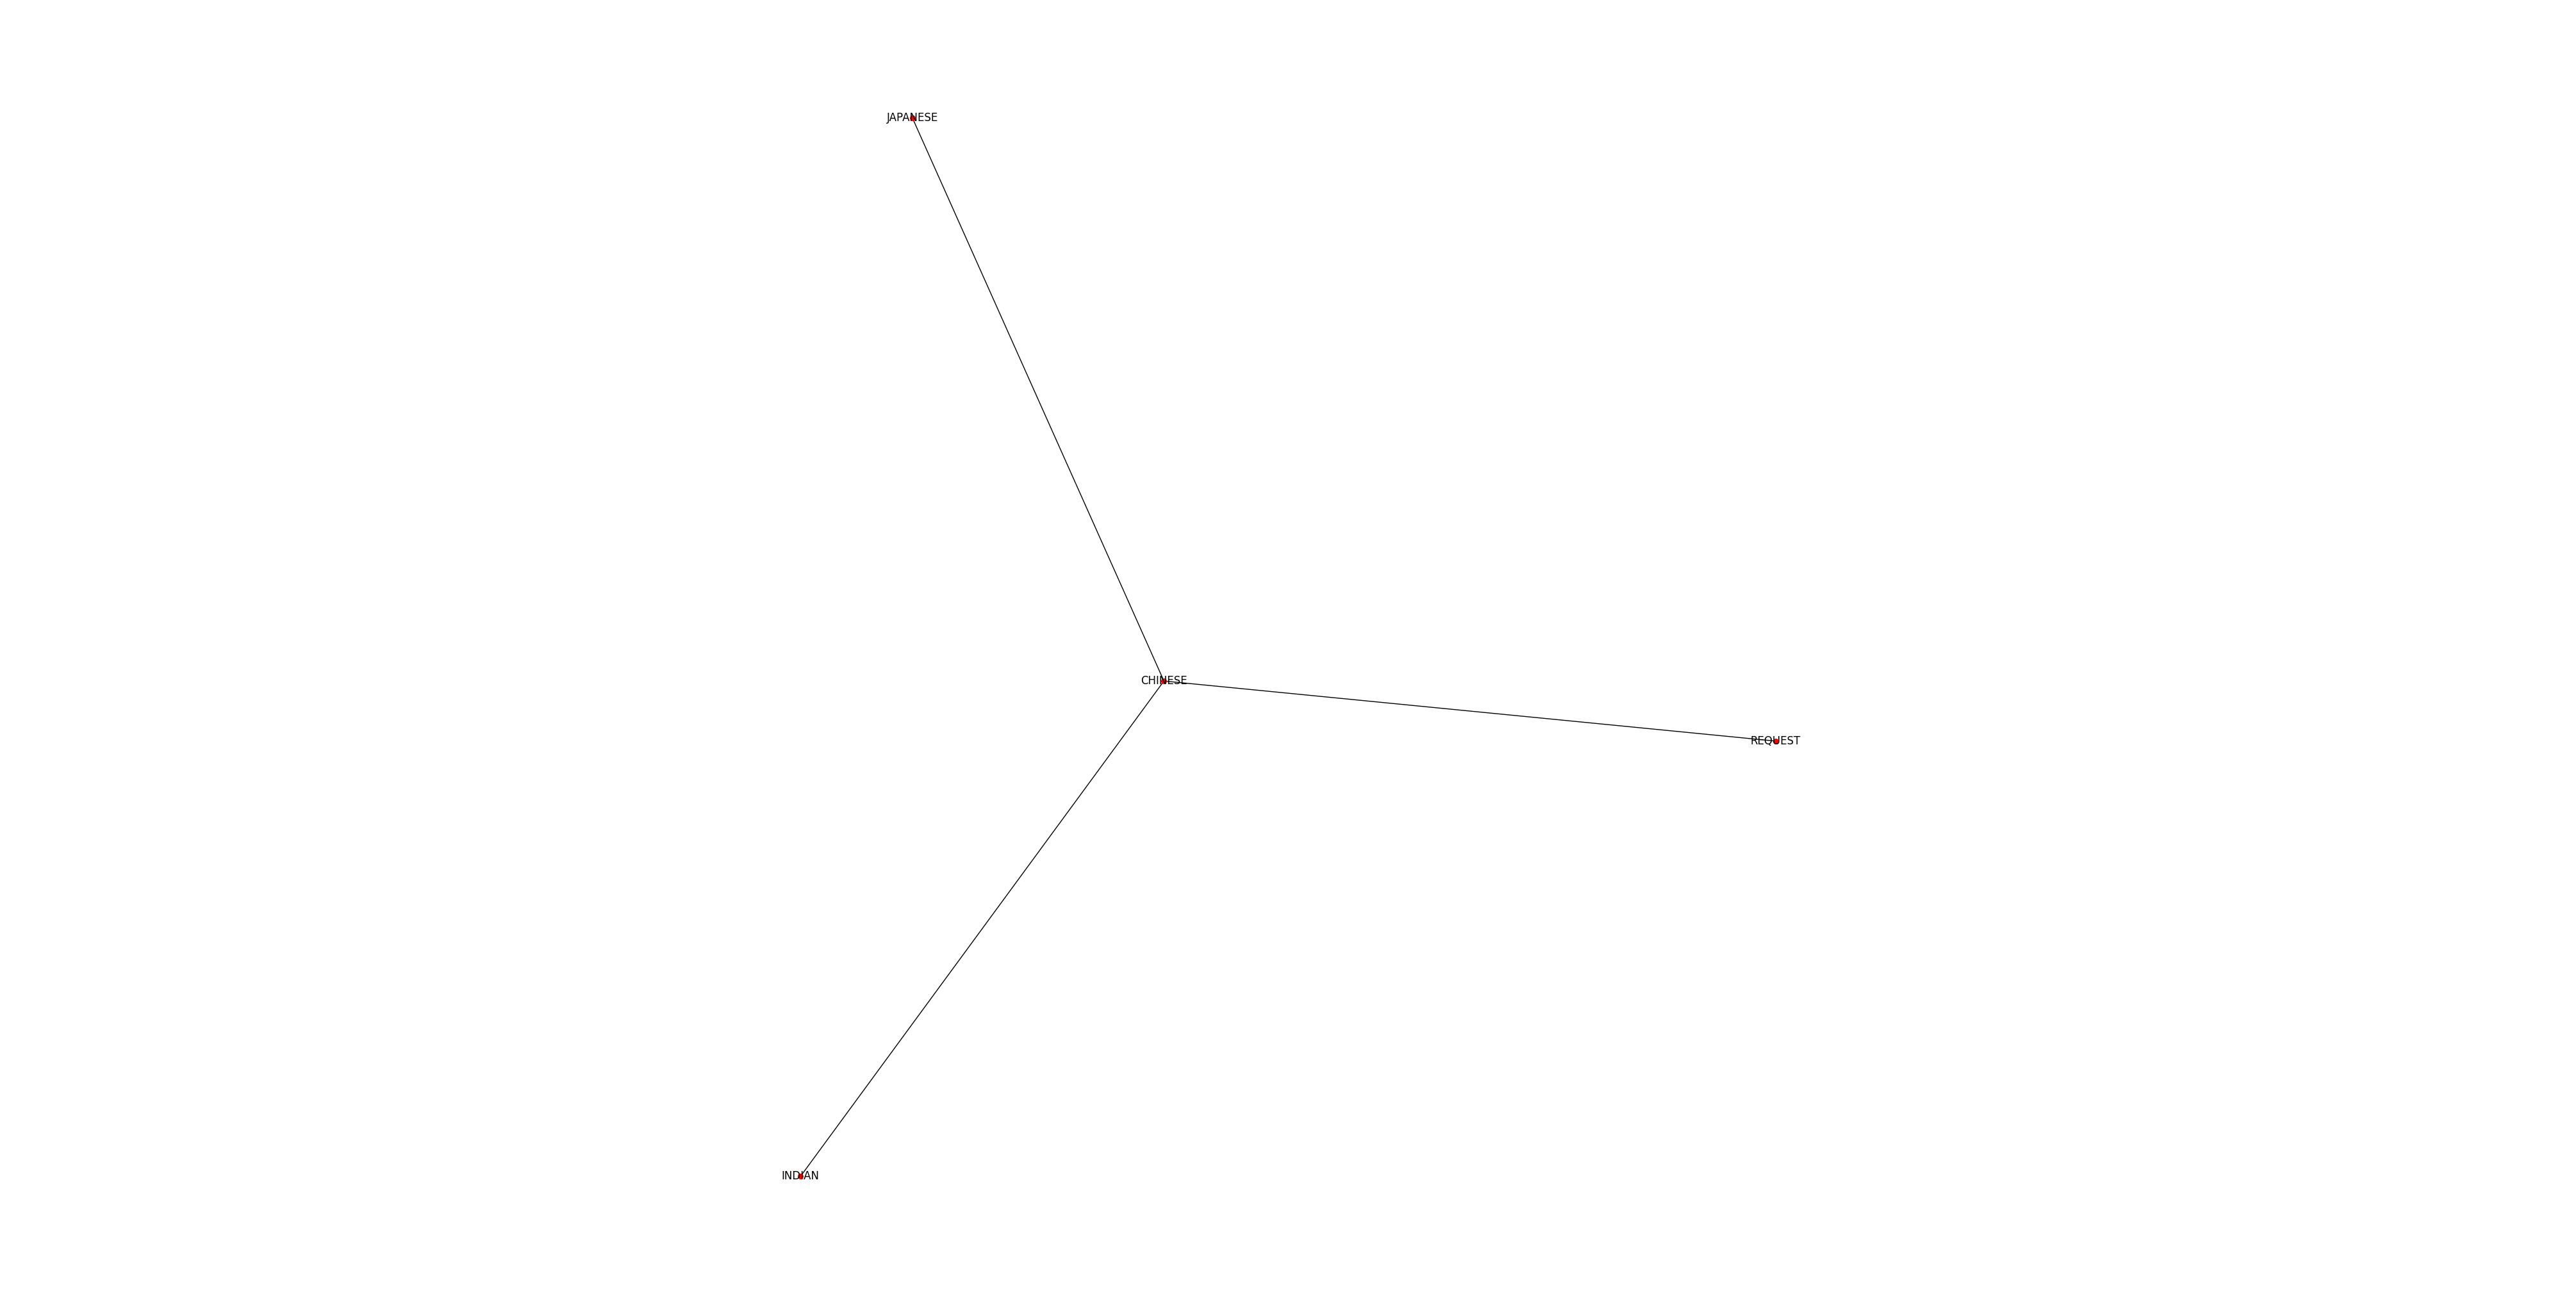

In [210]:
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(40, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()
#fig.savefig('df_home_pf.svg')

<a class="anchor" id="5.1.2">

### 5.1.2 Apply the APRIORI to Restaurant Clients
    
</a>

In [211]:
#Get the pivot table only with 0 and 1
df_restaurant_bf_encoded = df_restaurant_bf.applymap(encode_units)

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/2326365990.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [212]:
# Apply the APRIORI algorithm
# Rules supported in at least 5% of the transactions (more info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
frequent_itemsets = apriori(df_restaurant_bf_encoded, min_support=0.05, use_colnames=True)

In [213]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets,length
2,0.982964,(DRINKS),1
1,0.683968,(CHINESE),1
7,0.675848,"(CHINESE, DRINKS)",2
0,0.256329,(BUFFET),1
6,0.252189,"(BUFFET, DRINKS)",2
3,0.241522,(INDIAN),1
11,0.238019,"(DRINKS, INDIAN)",2
4,0.193918,(JAPANESE),1
12,0.192963,"(DRINKS, JAPANESE)",2
8,0.180704,"(CHINESE, INDIAN)",2


In [214]:
#Some consideration about these categories:
# 1. 98% ask for Drinks (high percentage). 1st Difference compared to Delievry Clients
 #   Since all order have drinks i will not focused the relations about Drinks wit other categories for now
# 2. 68% ask for Chinese food. Small reduction comapred to Delivery Clients but keeps the highest requested food
# 3. 67% of time asks for DRinks and Chinese
# 4. 25% asks for Buffet. Difference compared to delivery Clients. Delivery dont ask for Buffet
# 5. 24% asks for Indian. very very similar to the Delivery Clients (23%)
# 6. 20% asks for Japanese. Equal to delivery Clients (20%)
# 7. 18% asks for Indian and Chinese. More that the delivery Clients (13%)
# 8. 17% Asks for Chinese and Japanese. Similar to Delivery Clients (15%)
# 9. 16% asks fro Chinese and Request.Very similar to Delivery Clients (18%)

In [215]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rulesConfidence.sort_values(by=['confidence'], ascending=False, inplace=True)
rulesConfidence.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,"(DRINKS, REQUEST)",(CHINESE),0.160802,0.683968,0.160802,1.000000,1.462058,0.050819,inf,0.376589
5,(REQUEST),(CHINESE),0.162235,0.683968,0.162235,1.000000,1.462058,0.051272,inf,0.377233
12,"(CHINESE, JAPANESE)",(DRINKS),0.179271,0.982964,0.178475,0.995560,1.012813,0.002258,3.836395,0.015415
7,(JAPANESE),(DRINKS),0.193918,0.982964,0.192963,0.995074,1.012319,0.002348,3.458207,0.015097
17,(REQUEST),"(CHINESE, DRINKS)",0.162235,0.675848,0.160802,0.991168,1.466555,0.051156,36.701233,0.379736
15,"(CHINESE, REQUEST)",(DRINKS),0.162235,0.982964,0.160802,0.991168,1.008345,0.001331,1.928798,0.009879
8,(REQUEST),(DRINKS),0.162235,0.982964,0.160802,0.991168,1.008345,0.001331,1.928798,0.009879
19,"(INDIAN, JAPANESE)",(DRINKS),0.064639,0.982964,0.064003,0.990148,1.007308,0.000464,1.729104,0.007756
20,"(CHINESE, INDIAN, JAPANESE)",(DRINKS),0.056679,0.982964,0.056042,0.988764,1.005900,0.000329,1.516160,0.006218
1,(CHINESE),(DRINKS),0.683968,0.982964,0.675848,0.988128,1.005253,0.003532,1.434991,0.016536


In [216]:
# 1. Since Drinks are present in almost every invoice (98%) is obvious that this category have huge relationshio with all other
#    So for now we will not focus on that
# 2. Everytime the Client asks for Chinese he asks for a Request (IMPORTANT) (Confidence of 1)
# 3. Almost everytime the Clients ask for chinese he can ask for Jpanese  (confidence of 0.92)
# 4. we can say that when a Clients ask for chines is likely to ask for Indian and japanese (the problem with this is the low support)

In [217]:
#high Confidence and High Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.8) & (rulesConfidence['lift'] >= 1)&(rulesConfidence['support'] >= 0.05)].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,"(DRINKS, REQUEST)",(CHINESE),0.160802,0.683968,0.160802,1.000000,1.462058,0.050819,inf,0.376589
5,(REQUEST),(CHINESE),0.162235,0.683968,0.162235,1.000000,1.462058,0.051272,inf,0.377233
12,"(CHINESE, JAPANESE)",(DRINKS),0.179271,0.982964,0.178475,0.995560,1.012813,0.002258,3.836395,0.015415
7,(JAPANESE),(DRINKS),0.193918,0.982964,0.192963,0.995074,1.012319,0.002348,3.458207,0.015097
17,(REQUEST),"(CHINESE, DRINKS)",0.162235,0.675848,0.160802,0.991168,1.466555,0.051156,36.701233,0.379736
15,"(CHINESE, REQUEST)",(DRINKS),0.162235,0.982964,0.160802,0.991168,1.008345,0.001331,1.928798,0.009879
8,(REQUEST),(DRINKS),0.162235,0.982964,0.160802,0.991168,1.008345,0.001331,1.928798,0.009879
19,"(INDIAN, JAPANESE)",(DRINKS),0.064639,0.982964,0.064003,0.990148,1.007308,0.000464,1.729104,0.007756
20,"(CHINESE, INDIAN, JAPANESE)",(DRINKS),0.056679,0.982964,0.056042,0.988764,1.005900,0.000329,1.516160,0.006218
1,(CHINESE),(DRINKS),0.683968,0.982964,0.675848,0.988128,1.005253,0.003532,1.434991,0.016536


In [218]:
# Substitue products
rulesLift2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesLift2.sort_values(by='lift', ascending=True, inplace=True)
rulesLift2.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(DRINKS),(BUFFET),0.982964,0.256329,0.252189,0.256560,1.000902,0.000227,1.000311,0.052889
0,(BUFFET),(DRINKS),0.256329,0.982964,0.252189,0.983851,1.000902,0.000227,1.054891,0.001212
11,(INDIAN),(DRINKS),0.241522,0.982964,0.238019,0.985498,1.002577,0.000612,1.174675,0.003389
10,(DRINKS),(INDIAN),0.982964,0.241522,0.238019,0.242144,1.002577,0.000612,1.000821,0.150889
22,(DRINKS),"(CHINESE, INDIAN)",0.982964,0.180704,0.178475,0.181568,1.004782,0.000849,1.001056,0.279382


In [219]:
# 1. Very low confidence between Buffet and Drinks. When someone asks for drink we dont know he is going to ask for Bufet
# 2. Very low confidence between Indian and Drinks.  When someone asks for drink we dont know he is going to ask for Indian

<a class="anchor" id="5.2">

### 5.2.  Product Family Comparison
    
</a>

<a class="anchor" id="5.2.1">

### 5.2.1 Apply the APRIORI to Delivery Clients
    
</a>

In [220]:
#Get the pivot table only with 0 and 1
df_delivery_pf_encoded = df_delivery_pf.applymap(encode_units)

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/1714904211.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [221]:
# Apply the APRIORI algorithm
# Rules supported in at least 10% of the transactions (more info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
frequent_itemsets = apriori(df_delivery_pf_encoded, min_support=0.05, use_colnames=True)

In [222]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values('support', ascending=False).head(15)

,support,itemsets,length
5,0.706124,(MEAT),1
8,0.675915,(RICE),1
34,0.589807,"(MEAT, RICE)",2
13,0.579531,(STARTERS),1
36,0.490341,"(STARTERS, MEAT)",2
44,0.469996,"(STARTERS, RICE)",2
64,0.420674,"(STARTERS, MEAT, RICE)",3
0,0.241471,(BARBECUE SKEWERS),1
7,0.233662,(PASTAS),1
17,0.221743,"(BARBECUE SKEWERS, RICE)",2


In [223]:
# 1. 70% asks for Meat (Chinese)
# 2. 67% asks for Rice (Chinese)
# 3. 58% asks for Rice and Meat (Chinese)
# 4. 57% asks for Starterst (Chinese)
# 5. 42% asks for Starters, Rice and meat (Chinese)
# 6. 23% asks for Pastas (Chinese)
# 7. 20% asks for Sushsi (Japanese)
# 8. 18% askas for Meat and Pastas (Chinese)

In [224]:
frequent_itemsets[(frequent_itemsets['length'] == 1 )].sort_values(by='support', ascending=False)

,support,itemsets,length
5,0.706124,(MEAT),1
8,0.675915,(RICE),1
13,0.579531,(STARTERS),1
0,0.241471,(BARBECUE SKEWERS),1
7,0.233662,(PASTAS),1
4,0.203864,(JAP SUSHI),1
6,0.171804,(MEAT IND),1
1,0.131730,(BREADS IND),1
9,0.122277,(RICE IND),1
2,0.112413,(EXTRAS),1


In [225]:
# 1. The most asked dish is MEAT (70%)
# 2. Rice is asked (67%)
# 3. Starters is asked (57%)
# Based on this the majority of orders have (MEAT, RICE and STARTERS) 
# 4. BARBECUE SKEWERS (24%)
# 5. Pastas (23%)
# 6. Sushi is 20%
# All the dises related with INDIAN food have low support (not very common)...around (10%)
# 7. Holds, Veg IND and Seafood is very rare (6%)

In [226]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rulesConfidence.sort_values(by=['confidence','support'], ascending=False, inplace=True)
rulesConfidence.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
22,"(EXTRAS, RICE)",(MEAT),0.086313,0.706124,0.084464,0.978571,1.385835,0.023516,13.714207,0.304714
40,"(EXTRAS, STARTERS, RICE)",(MEAT),0.064529,0.706124,0.063091,0.977707,1.384611,0.017525,13.182432,0.296936
23,"(EXTRAS, STARTERS)",(MEAT),0.077476,0.706124,0.075010,0.968170,1.371104,0.020302,9.232600,0.293392
43,"(STARTERS, MEAT, SAUCE)",(RICE),0.064118,0.675915,0.061036,0.951923,1.408348,0.017697,6.740978,0.309813
2,(EXTRAS),(MEAT),0.112413,0.706124,0.106864,0.950640,1.346279,0.027487,5.953708,0.289788
29,"(MEAT, SAUCE)",(RICE),0.085286,0.675915,0.080764,0.946988,1.401047,0.023119,6.113431,0.312937
14,"(MEAT, BARBECUE SKEWERS)",(RICE),0.205919,0.675915,0.193588,0.940120,1.390886,0.054405,5.412228,0.353910
36,"(STARTERS, MEAT, BARBECUE SKEWERS)",(RICE),0.157624,0.675915,0.148171,0.940026,1.390747,0.041630,5.403773,0.333535
35,"(STARTERS, SAUCE)",(RICE),0.073366,0.675915,0.068845,0.938375,1.388305,0.019256,5.259024,0.301842
4,(HOLDS),(PASTAS),0.069667,0.233662,0.065351,0.938053,4.014570,0.049073,12.370883,0.807138


In [227]:
# 1. It seems that Rice and Meat since they are frequent asked...thye have a lot of relation with other products
# 1. When asks for Meat also asks fo Rice and Extras (0.9) (but low support)
# 2. When asks for Meat also asks fo Rice, Extras and STARTERS (but low support)
# 3. We want to find relations with High confidence and lift

In [228]:
#See the products with high lift and confidence...and with some support
rulesConfidence[(rulesConfidence['lift'] >1 )& (rulesConfidence['confidence'] >= 0.85)&(rulesConfidence['support'] >= 0.1)].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,"(MEAT, BARBECUE SKEWERS)",(RICE),0.205919,0.675915,0.193588,0.940120,1.390886,0.054405,5.412228,0.353910
36,"(STARTERS, MEAT, BARBECUE SKEWERS)",(RICE),0.157624,0.675915,0.148171,0.940026,1.390747,0.041630,5.403773,0.333535
20,"(STARTERS, BARBECUE SKEWERS)",(RICE),0.180641,0.675915,0.167694,0.928328,1.373439,0.045596,4.521764,0.331846
1,(BARBECUE SKEWERS),(RICE),0.241471,0.675915,0.221743,0.918298,1.358601,0.058529,3.966671,0.347974
2,(EXTRAS),(MEAT),0.112413,0.706124,0.106864,0.950640,1.346279,0.027487,5.953708,0.289788
42,"(STARTERS, PASTAS, RICE)",(MEAT),0.123716,0.706124,0.112824,0.911960,1.291501,0.025465,3.337986,0.257573
32,"(STARTERS, MEAT)",(RICE),0.490341,0.675915,0.420674,0.857921,1.269275,0.089245,2.281026,0.416256
33,"(STARTERS, RICE)",(MEAT),0.469996,0.706124,0.420674,0.895059,1.267566,0.088799,2.800392,0.398273
27,"(PASTAS, RICE)",(MEAT),0.160501,0.706124,0.142622,0.888604,1.258425,0.029288,2.638127,0.244617
37,"(STARTERS, BARBECUE SKEWERS, RICE)",(MEAT),0.167694,0.706124,0.148171,0.883578,1.251308,0.029758,2.524239,0.241301


In [229]:
# 1.Who asks for Meat IND os very likely to ask for Rice IND (big lift)
# 2. Who asks for Meat is likely to ask fo Starters and Rice
# 3. Who asks for Rice is very likely to ask for (STARTERS, MEAT, BARBECUE SKEWERS)
# 3. Who asks for Meat is likely to ask for Rice

In [230]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
90,"(BREADS IND, MEAT IND)",(RICE IND),0.100493,0.122277,0.062474,0.621677,5.084168,0.050186,2.320035,0.893057
95,(RICE IND),"(BREADS IND, MEAT IND)",0.122277,0.100493,0.062474,0.510924,5.084168,0.050186,1.839198,0.915222
91,"(BREADS IND, RICE IND)",(MEAT IND),0.073777,0.171804,0.062474,0.846797,4.928843,0.049799,5.405859,0.860606
94,(MEAT IND),"(BREADS IND, RICE IND)",0.171804,0.073777,0.062474,0.363636,4.928843,0.049799,1.455493,0.962469
37,(RICE IND),(MEAT IND),0.122277,0.171804,0.102959,0.842017,4.901021,0.081952,5.242302,0.906848


In [231]:
# 1. The bigger value for Lift is related to INDIAN food
# 2. who asks for Meat IND is very likely to ask fo Bread IND and Rice Ind
# 3. Altought these kind of orders have a low value of support (not very frequent)

In [232]:
# Length=3 and Support>=0.15
frequent_itemsets[(frequent_itemsets['length'] == 3 )& (frequent_itemsets['support'] >= 0.15)]

,support,itemsets,length
48,0.193588,"(MEAT, BARBECUE SKEWERS, RICE)",3
49,0.157624,"(STARTERS, MEAT, BARBECUE SKEWERS)",3
52,0.167694,"(STARTERS, BARBECUE SKEWERS, RICE)",3
64,0.420674,"(STARTERS, MEAT, RICE)",3


In [233]:
# Substitue products
rulesLift2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesLift2.sort_values(by='lift', ascending=True, inplace=True)
rulesLift2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
35,(MEAT),(MEAT IND),0.706124,0.171804,0.051377,0.072759,0.423499,-0.069938,0.893183,-0.822448
34,(MEAT IND),(MEAT),0.171804,0.706124,0.051377,0.299043,0.423499,-0.069938,0.419250,-0.621738
44,(MEAT IND),(RICE),0.171804,0.675915,0.055898,0.325359,0.481361,-0.060227,0.480382,-0.565397
45,(RICE),(MEAT IND),0.675915,0.171804,0.055898,0.082700,0.481361,-0.060227,0.902862,-0.768763
144,"(STARTERS, RICE)",(JAP SUSHI),0.469996,0.203864,0.056309,0.119808,0.587685,-0.039506,0.904503,-0.569660
145,(JAP SUSHI),"(STARTERS, RICE)",0.203864,0.469996,0.056309,0.276210,0.587685,-0.039506,0.732262,-0.468437
141,(JAP SUSHI),"(STARTERS, MEAT)",0.203864,0.490341,0.061241,0.300403,0.612641,-0.038721,0.728504,-0.442643
136,"(STARTERS, MEAT)",(JAP SUSHI),0.490341,0.203864,0.061241,0.124895,0.612641,-0.038721,0.909761,-0.553689
132,"(MEAT, RICE)",(JAP SUSHI),0.589807,0.203864,0.085080,0.144251,0.707585,-0.035160,0.930339,-0.501860
133,(JAP SUSHI),"(MEAT, RICE)",0.203864,0.589807,0.085080,0.417339,0.707585,-0.035160,0.703999,-0.341706


In [234]:
#Subsitute products
# 1. very uncomon to ask for Meat and Meat Ind
# 2. very uncomon to ask for Rice and Meat ind
# 3. very uncomon to ask for MEAT and JAP SUSHI
# 4. Very uncommon to ask for Rice and Meat and then Order SUSHI

In [235]:
### Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]

In [236]:
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)

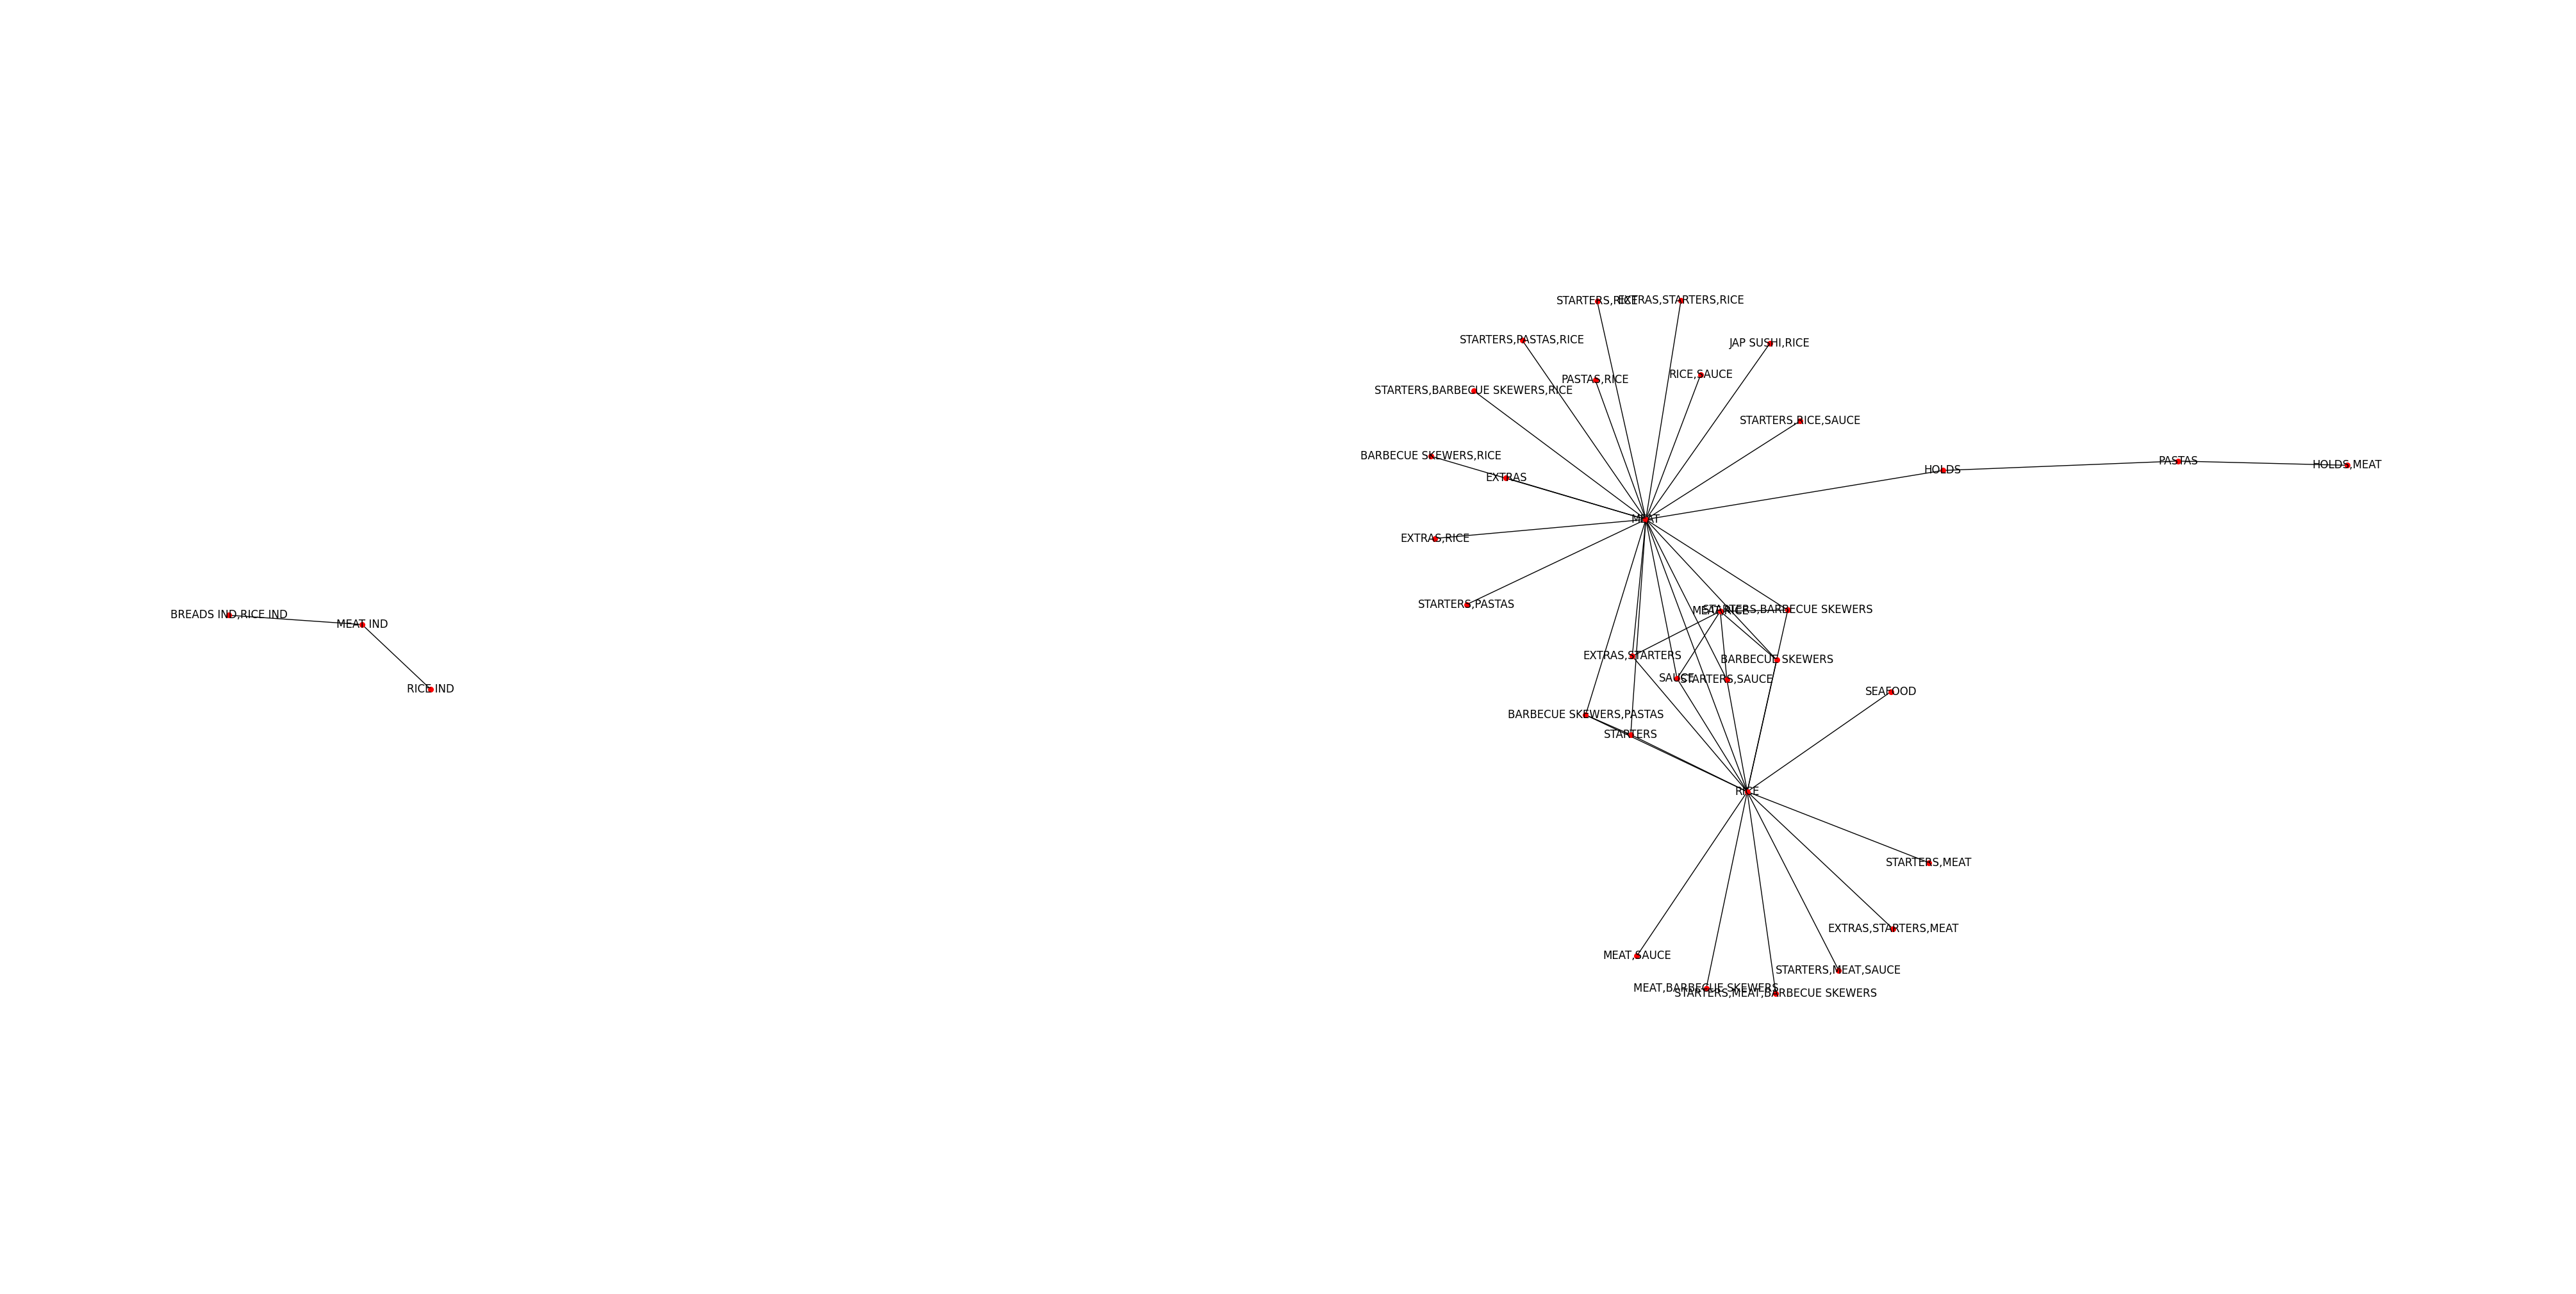

In [237]:
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(40, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()
#fig.savefig('df_home_pf.svg')

<a class="anchor" id="5.2.2">

### 5.2.2 Apply the APRIORI to Restaurant Clients
    
</a>

In [238]:
#Get the pivot table only with 0 and 1
df_restaurant_pf_encoded = df_restaurant_pf.applymap(encode_units)

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/1870788020.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [239]:
# Apply the APRIORI algorithm
# Rules supported in at least 10% of the transactions (more info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
frequent_itemsets = apriori(df_restaurant_pf_encoded, min_support=0.05, use_colnames=True)

In [240]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values('support', ascending=False).head(20)

,support,itemsets,length
22,0.919121,(WATER-ISH),1
8,0.601337,(MEAT),1
12,0.593377,(RICE),1
88,0.566311,"(MEAT, WATER-ISH)",2
113,0.559783,"(WATER-ISH, RICE)",2
81,0.542430,"(MEAT, RICE)",2
255,0.512180,"(MEAT, WATER-ISH, RICE)",3
20,0.462028,(STARTERS),1
130,0.436714,"(STARTERS, WATER-ISH)",2
112,0.417768,"(STARTERS, RICE)",2


In [241]:
# 1. 91% asks for Water-Ish (Already a diference with Delivery Clients)
#    Since water is very common in invoice we will not take a look ate the relations that have water
# 2. 60% asks for Meat (Chinese). less than 10% than delivery Clients
# 3. 59% asks for Rice (Chinese)
# 4. 54% have Rice and Meat (Chinese). Similar to Delivery Clients
# 4. 46% asks for Starterst (Chinese). Diffenrec from Delivery Clients (57%)
# 5. 39% asks for Starters, Rice and Meat. Similar to Delivery Cliuenst (42%)
# 6. 33% asks for Dessert. Big Difference and compared with Delivery Clients (they dont ask for dessert)
# 7. 31% asks for Soft Drinks. Also a big difference comapred Delivery Clients

In [242]:
frequent_itemsets[(frequent_itemsets['length'] == 1 )].sort_values(by='support', ascending=False)

,support,itemsets,length
22,0.919121,(WATER-ISH),1
8,0.601337,(MEAT),1
12,0.593377,(RICE),1
20,0.462028,(STARTERS),1
4,0.330521,(DESSERT),1
23,0.317465,(WHITE WINES),1
17,0.313485,(SOFT DRINKS),1
0,0.264130,(BARBECUE SKEWERS),1
3,0.256329,(BUFFET),1
10,0.232288,(PASTAS),1


In [243]:
# 1. The most asked dish is Water-Wish (92%)
# 2. MEAT is asked (60%). Less 10% than delivery clients
# 3. Rice is 59&
# 3. Starters is askedn(46%). Less 11% than delivery Clients (57%)
# 4. Dessert is asked 33%. The delivery clients dont ask dessert..or if asks is very very rare
# Based on this the majority of orders have (MEAT, RICE and STARTERS, Dessert) 
# 5. White wines (30%)
# 6. Soft drinks (30%)
# 7. Buffet (25%). The delivery Clients dont ask for Buffet (never)
# 8. BARBECUE SKEWERS (24%)
# 9. Pastas (23%). Similar to delivery Clients
# 10. Sushi is 20%. Similar to Delivery Clients
# All the dises related with INDIAN food have low support (not very common)...around (15%). very similar to delivery Clients
# 11. Ginger, Veg IND and Seafood is very rare (6%). these categories are the same as Delivery clients

In [244]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rulesConfidence.sort_values(by=['confidence','support'], ascending=False, inplace=True)
rulesConfidence.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1269,"(BARBECUE SKEWERS, STARTERS, MEAT, SOFT DRINKS...",(RICE),0.078809,0.593377,0.078172,0.991919,1.671651,0.031409,50.319615,0.436163
845,"(SOFT DRINKS, STARTERS, MEAT, BARBECUE SKEWERS)",(RICE),0.082630,0.593377,0.081834,0.990366,1.669034,0.032803,42.207483,0.436957
893,"(SOFT DRINKS, STARTERS, BARBECUE SKEWERS, WATE...",(RICE),0.082153,0.593377,0.081197,0.988372,1.665673,0.032450,34.969591,0.435412
431,"(HOLDS, STARTERS, DESSERT)",(PASTAS),0.051743,0.232288,0.051107,0.987692,4.252019,0.039087,62.376612,0.806551
865,"(WHITE WINES, STARTERS, MEAT, BARBECUE SKEWERS)",(RICE),0.077058,0.593377,0.076103,0.987603,1.664378,0.030378,32.800934,0.432503
1178,"(DESSERT, BARBECUE SKEWERS, MEAT, SOFT DRINKS,...",(RICE),0.051107,0.593377,0.050470,0.987539,1.664269,0.020144,32.631508,0.420633
1280,"(BARBECUE SKEWERS, STARTERS, WHITE WINES, MEAT...",(RICE),0.075147,0.593377,0.074192,0.987288,1.663847,0.029601,31.987688,0.431402
418,"(HOLDS, DESSERT, MEAT)",(PASTAS),0.058112,0.232288,0.057316,0.986301,4.246031,0.043817,56.042987,0.811652
1186,"(DESSERT, BARBECUE SKEWERS, STARTERS, MEAT, WA...",(RICE),0.089954,0.593377,0.088680,0.985841,1.661407,0.035304,28.717760,0.437451
910,"(HOLDS, DESSERT, MEAT, RICE)",(PASTAS),0.055405,0.232288,0.054609,0.985632,4.243150,0.041739,53.432765,0.809158


In [245]:
# 1. Rice is very order so is normal to have identical relatiosnhips and all of them with Rice (need to find good relations)
# 2. When somoene asks for Rice is very likely to asks for (STARTERS, WATER-ISH, MEAT, BARBECUE SKEWERS). Support (18%)
# 3. When someone asks for Rice is very likely to ask for (STARTERS, BARBECUE SKEWERS)

In [246]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift[rulesLift['support']>0.15].head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4655,"(DESSERT, RICE)","(STARTERS, MEAT, WATER-ISH)",0.217163,0.394842,0.161121,0.741935,1.879071,0.075376,2.344989,0.597598
4654,"(STARTERS, MEAT, WATER-ISH)","(DESSERT, RICE)",0.394842,0.217163,0.161121,0.408065,1.879071,0.075376,1.322504,0.773057
4647,"(DESSERT, WATER-ISH, RICE)","(STARTERS, MEAT)",0.208247,0.416653,0.161121,0.773700,1.856940,0.074354,2.577761,0.582858
4662,"(STARTERS, MEAT)","(DESSERT, WATER-ISH, RICE)",0.416653,0.208247,0.161121,0.386702,1.856940,0.074354,1.290977,0.791090
2154,"(STARTERS, MEAT)","(DESSERT, RICE)",0.416653,0.217163,0.167648,0.402369,1.852845,0.077167,1.309901,0.789050
2159,"(DESSERT, RICE)","(STARTERS, MEAT)",0.217163,0.416653,0.167648,0.771994,1.852845,0.077167,2.558472,0.587976
4657,"(DESSERT, MEAT)","(STARTERS, WATER-ISH, RICE)",0.220188,0.396274,0.161121,0.731743,1.846555,0.073866,2.250546,0.587899
4652,"(STARTERS, WATER-ISH, RICE)","(DESSERT, MEAT)",0.396274,0.220188,0.161121,0.406589,1.846555,0.073866,1.314118,0.759370
4087,"(MEAT, BARBECUE SKEWERS)","(STARTERS, WATER-ISH, RICE)",0.241363,0.396274,0.176564,0.731530,1.846019,0.080918,2.248766,0.604102
4082,"(STARTERS, WATER-ISH, RICE)","(MEAT, BARBECUE SKEWERS)",0.396274,0.241363,0.176564,0.445560,1.846019,0.080918,1.368296,0.759110


In [247]:
# 1. Another time the Products with highest Lift is Indian Food (if we consider a support at least 10% the Indian food appers)

In [248]:
# Length=4 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] == 4)& (frequent_itemsets['support'] >= 0.2)]

,support,itemsets,length
346,0.223213,"(MEAT, BARBECUE SKEWERS, WATER-ISH, RICE)",4
441,0.369527,"(STARTERS, MEAT, WATER-ISH, RICE)",4


In [249]:
# 1. WATER-ISH, RICE, MEAT, BARBECUE SKEWERS are common (22%)
# 2. (STARTERS, RICE, WATER-ISH, MEAT) also common (36%)

In [250]:
# Length=3 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] == 3 )& (frequent_itemsets['support'] >= 0.2)]

,support,itemsets,length
151,0.234994,"(MEAT, BARBECUE SKEWERS, RICE)",3
154,0.229104,"(MEAT, BARBECUE SKEWERS, WATER-ISH)",3
161,0.242000,"(BARBECUE SKEWERS, WATER-ISH, RICE)",3
193,0.205222,"(DESSERT, MEAT, RICE)",3
197,0.210476,"(DESSERT, MEAT, WATER-ISH)",3
206,0.208247,"(DESSERT, WATER-ISH, RICE)",3
254,0.389747,"(STARTERS, MEAT, RICE)",3
255,0.512180,"(MEAT, WATER-ISH, RICE)",3
267,0.394842,"(STARTERS, MEAT, WATER-ISH)",3
302,0.396274,"(STARTERS, WATER-ISH, RICE)",3


In [251]:
# The dishes (WATER-ISH, MEAT, BARBECUE SKEWERS, Dessert,Starters) are related and very frequent

In [252]:
# Substitue products
rulesLift2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesLift2.sort_values(by='lift', ascending=True, inplace=True)
rulesLift2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2735,"(STARTERS, MEAT, RICE)",(MEAT IND),0.389747,0.188346,0.053495,0.137255,0.728739,-0.019913,0.940781,-0.378869
2746,(MEAT IND),"(STARTERS, MEAT, RICE)",0.188346,0.389747,0.053495,0.284024,0.728739,-0.019913,0.852337,-0.314416
39,(RICE),(BREADS IND),0.593377,0.127368,0.055564,0.093641,0.735199,-0.020013,0.962788,-0.469714
38,(BREADS IND),(RICE),0.127368,0.593377,0.055564,0.436250,0.735199,-0.020013,0.721283,-0.292159
5205,"(STARTERS, MEAT, WATER-ISH, RICE)",(MEAT IND),0.369527,0.188346,0.051903,0.140457,0.745738,-0.017696,0.944285,-0.350982
5232,(MEAT IND),"(STARTERS, MEAT, WATER-ISH, RICE)",0.188346,0.369527,0.051903,0.275571,0.745738,-0.017696,0.870303,-0.295810
5209,"(STARTERS, MEAT, RICE)","(MEAT IND, WATER-ISH)",0.389747,0.178156,0.051903,0.133170,0.747489,-0.017533,0.948102,-0.356317
5228,"(MEAT IND, WATER-ISH)","(STARTERS, MEAT, RICE)",0.178156,0.389747,0.051903,0.291332,0.747489,-0.017533,0.861126,-0.291304
499,(BREADS IND),"(WATER-ISH, RICE)",0.127368,0.559783,0.053495,0.420000,0.750290,-0.017804,0.758994,-0.276094
498,"(WATER-ISH, RICE)",(BREADS IND),0.559783,0.127368,0.053495,0.095563,0.750290,-0.017804,0.964834,-0.430534


In [253]:
#Subsitute products
# 1. very uncomon to ask for Meat and Meat Ind
# 2. very uncomon to ask for Rice and Meat ind
# 3. very uncomon to if someone ask for Water-Ish to ask to Soft drinks

In [254]:
### Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]

In [255]:
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)

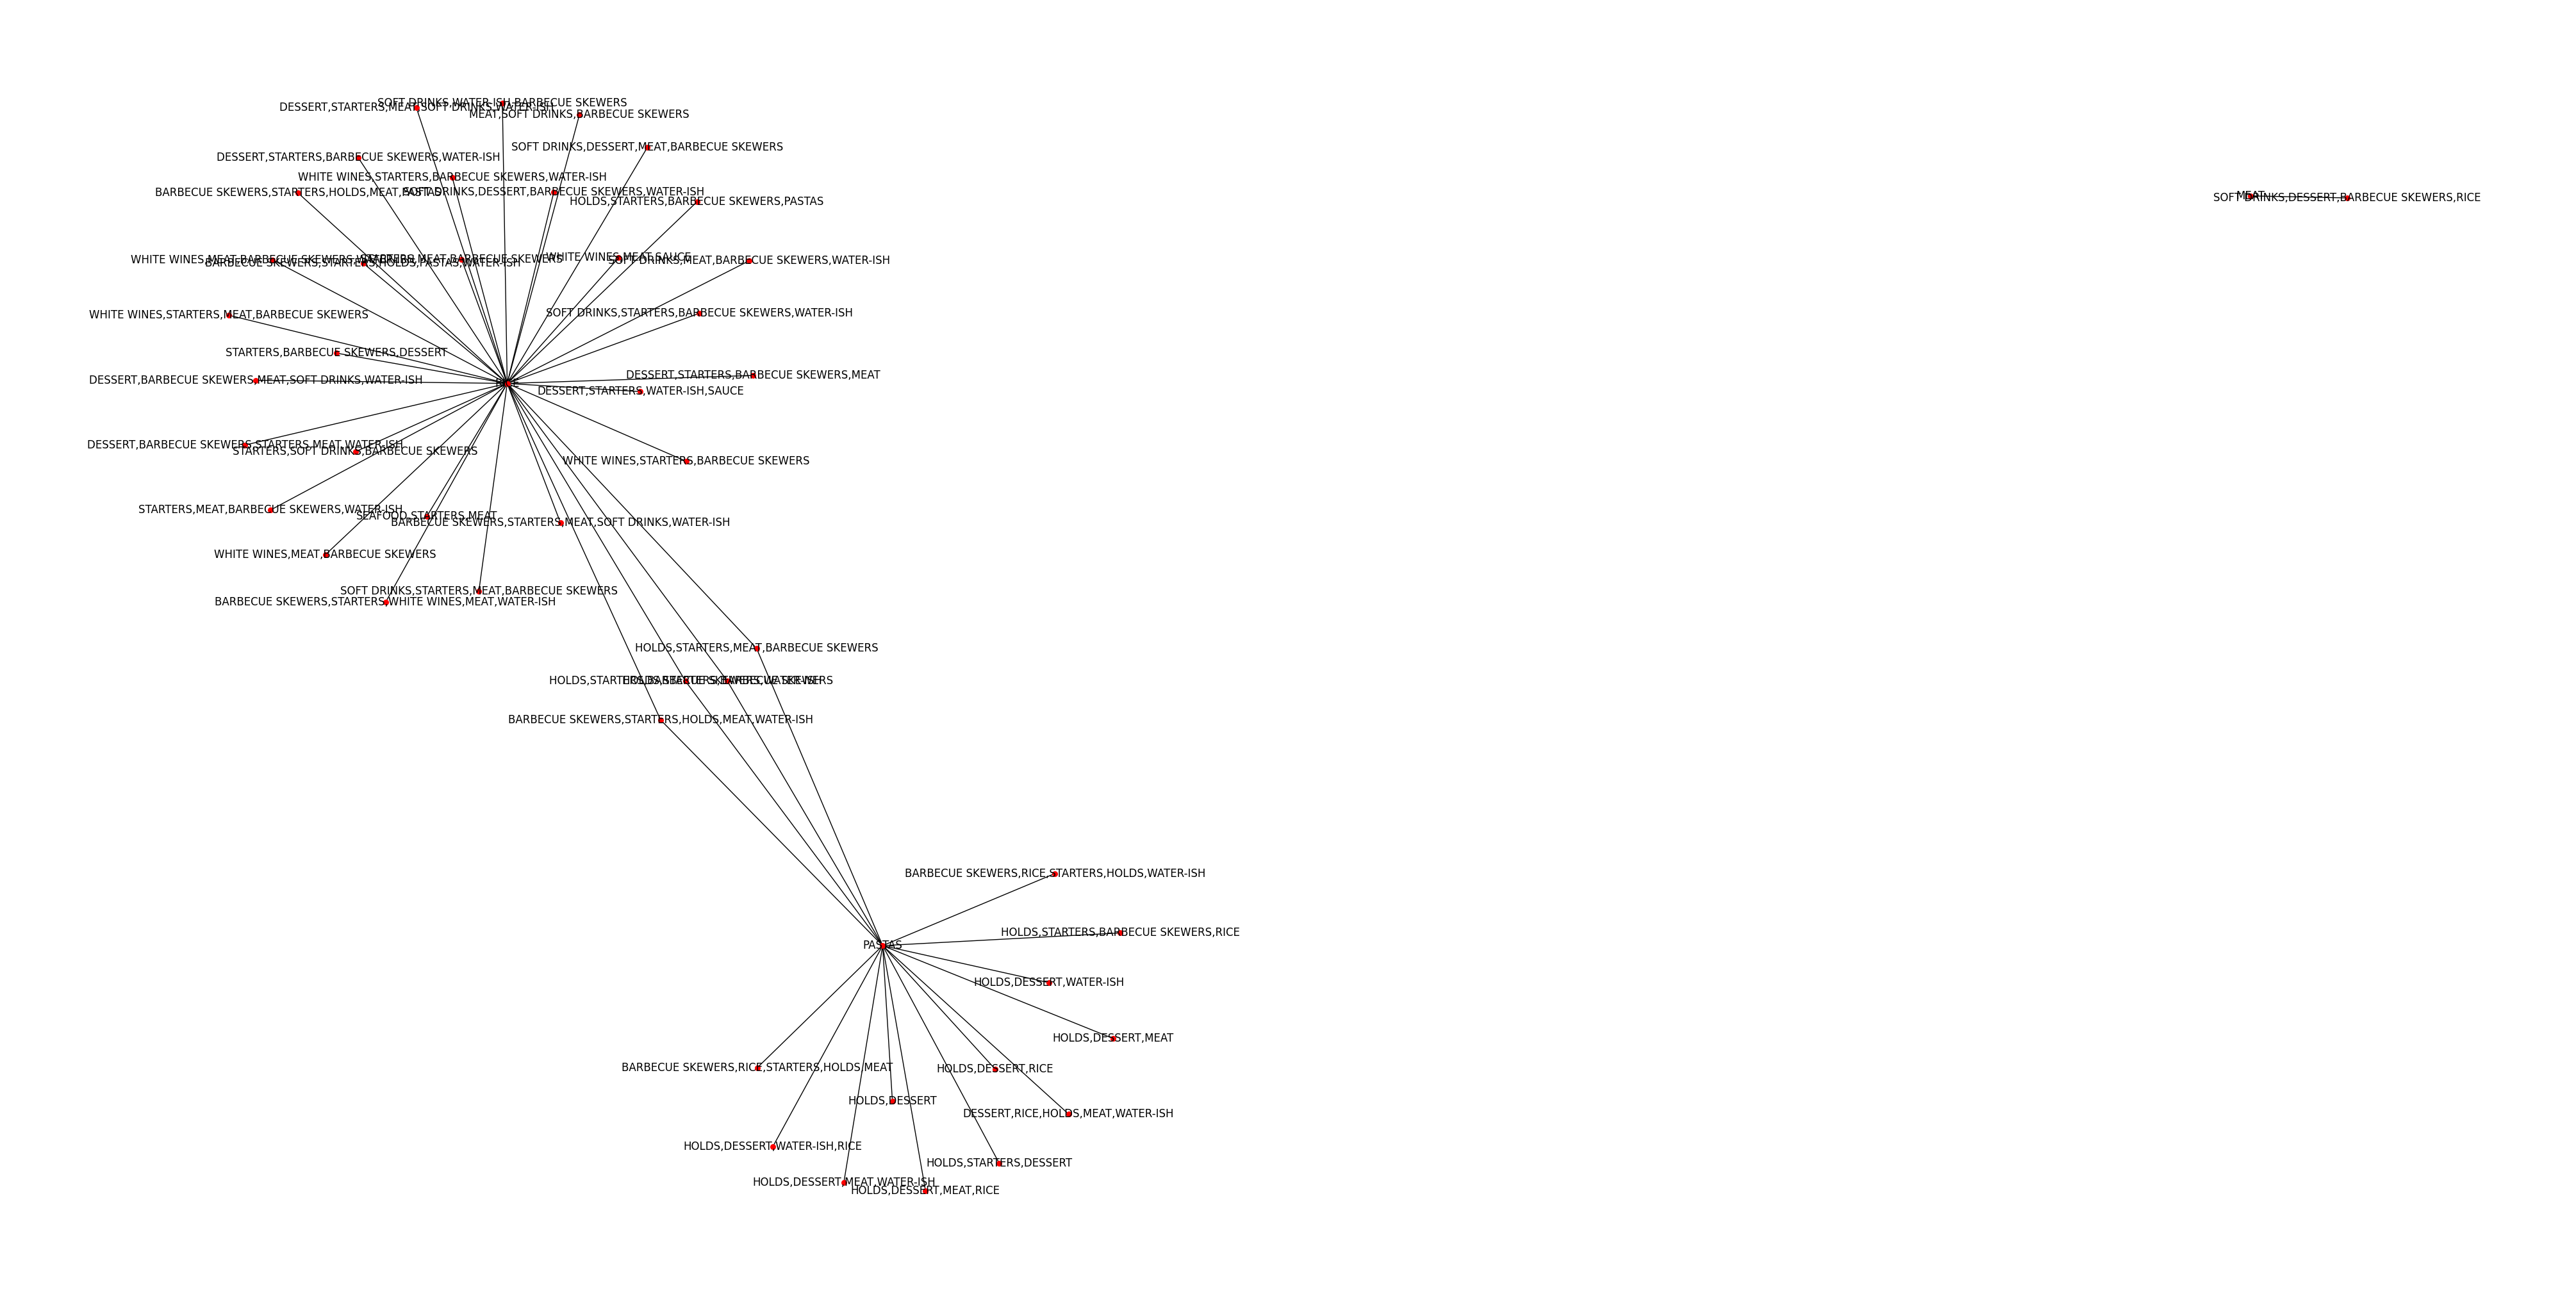

In [256]:
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(40, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()
#fig.savefig('df_home_pd.svg')

<a class="anchor" id="5.3">

### 5.3.  Product Designation Comparison
    
</a>

<a class="anchor" id="5.3.1">

### 5.3.1 Apply the APRIORI to Delivery Clients
    
</a>

In [257]:
#Get the pivot table only with 0 and 1
df_delivery_pd_encoded = df_delivery_pd.applymap(encode_units)

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/753343323.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [258]:
# Apply the APRIORI algorithm
# Rules supported in at least 10% of the transactions (more info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
frequent_itemsets = apriori(df_delivery_pd_encoded, min_support=0.05, use_colnames=True)

In [259]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values('support', ascending=False).head(15)

,support,itemsets,length
10,0.412659,(EGG FRIED RICE),1
22,0.354706,(SPRING ROLL),1
24,0.335799,(SWEET SOUR CHICKEN),1
4,0.236745,(1/4 DUCK),1
45,0.215577,"(SWEET SOUR CHICKEN, EGG FRIED RICE)",2
7,0.183313,(BEEF BBS),1
44,0.175298,"(SPRING ROLL, EGG FRIED RICE)",2
17,0.168516,(PRAWN CRACKERS),1
54,0.147143,"(SWEET SOUR CHICKEN, SPRING ROLL)",2
5,0.137485,(1/6 DUCK),1


In [260]:
# 1. 41% asks forEGG FRIED RICE
# 2. 35% SPRING ROLL
# 3. 33% asks for SWEET SOUR CHICKEN
# 4. 21% asks SWEET SOUR CHICKEN, EGG FRIED RICE
# 4. 17% EGG FRIED RICE, SPRING ROLL
# 4. 18% BEEF BBS
# 5. 14% SWEET SOUR CHICKEN, SPRING ROLL
# 6. 12% SESAME PRAWNS
# 7. 12% STEAMED RICE
# 7. 11% NAAN
# 8. As we can see we have a lot of Starters, Meat

In [261]:
frequent_itemsets[(frequent_itemsets['length'] == 1 )].sort_values(by='support', ascending=False).head(15)

,support,itemsets,length
10,0.412659,(EGG FRIED RICE),1
22,0.354706,(SPRING ROLL),1
24,0.335799,(SWEET SOUR CHICKEN),1
4,0.236745,(1/4 DUCK),1
7,0.183313,(BEEF BBS),1
17,0.168516,(PRAWN CRACKERS),1
5,0.137485,(1/6 DUCK),1
20,0.129059,(SESAME PRAWNS),1
23,0.126182,(STEAMED RICE),1
16,0.125976,(NOODLES WITH MEAT),1


In [262]:
# 1. 41% asks for EGG FRIED RICE
# 2. 35% SPRING ROLL
# 3. 33% asks for SWEET SOUR CHICKEN
# 4. 23% asks for 1/4 Duck
# 4. 18% BEEF BBS
# 5. 16% asks for Prawn Crackers
# 6  13% asks for 1/6 Duck
# 6. 12% SESAME PRAWNS
# 7. 12% STEAMED RICE
# 7. 11% NAAN
# 8. As we can see againthe main dishes are:
# Starters:SPRING ROLL,Prawn Crackers,SESAME PRAWNS,EGG FRIED RICE
# MEAT: SWEET SOUR CHICKEN, 1/4 DUCK, BEEF BBS, 1/6 DUCK
# RICE: STEAMED RICE, SPECIAL MONTPARNASSE RICE

In [263]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rulesConfidence.sort_values(by=['confidence','support'], ascending=False, inplace=True)
rulesConfidence.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,( NO MEAT),(NOODLES WITH MEAT),0.062474,0.125976,0.062474,1.000000,7.938010,0.054604,inf,0.932267
1,( EXTRA PANCAKES),( EXTRA SAUCE),0.085491,0.090423,0.063913,0.747596,8.267734,0.056182,3.603656,0.961224
0,( EXTRA SAUCE),( EXTRA PANCAKES),0.090423,0.085491,0.063913,0.706818,8.267734,0.056182,3.119255,0.966436
34,"(1/4 DUCK, SWEET SOUR CHICKEN)",(EGG FRIED RICE),0.105220,0.412659,0.070695,0.671875,1.628159,0.027275,1.789991,0.431178
18,(SWEET SOUR CHICKEN),(EGG FRIED RICE),0.335799,0.412659,0.215577,0.641983,1.555721,0.077007,1.640538,0.537807
36,"(SWEET SOUR CHICKEN, SPRING ROLL)",(EGG FRIED RICE),0.147143,0.412659,0.091451,0.621508,1.506105,0.030731,1.551793,0.394012
12,(LEMON CHICKEN),(EGG FRIED RICE),0.106453,0.412659,0.064118,0.602317,1.459598,0.020190,1.476905,0.352393
9,(BEEF BBS),(EGG FRIED RICE),0.183313,0.412659,0.109741,0.598655,1.450724,0.034095,1.463430,0.380426
32,"(1/4 DUCK, SPRING ROLL)",(EGG FRIED RICE),0.102548,0.412659,0.058570,0.571142,1.384053,0.016252,1.369547,0.309191
35,"(1/4 DUCK, EGG FRIED RICE)",(SWEET SOUR CHICKEN),0.126798,0.335799,0.070695,0.557536,1.660326,0.028116,1.501142,0.455460


In [264]:
# 2. Every time someone asks for Noodels with Meat..is very very likely to asks without Meat (This happens very few..low support)
# 3. Every time someone asks for Extra Sauce ..is very very likely to asks Extra Panackes (This happens very few..low support)

In [265]:
# Generate the association rules - by support
rulessupport = association_rules(frequent_itemsets, metric="support", min_threshold=0.05)
rulessupport.sort_values(by='support', ascending=False, inplace=True)
rulessupport[rulessupport['support']>0.09].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
34,(SWEET SOUR CHICKEN),(EGG FRIED RICE),0.335799,0.412659,0.215577,0.641983,1.555721,0.077007,1.640538,0.537807
35,(EGG FRIED RICE),(SWEET SOUR CHICKEN),0.412659,0.335799,0.215577,0.522410,1.555721,0.077007,1.390735,0.608184
32,(SPRING ROLL),(EGG FRIED RICE),0.354706,0.412659,0.175298,0.494206,1.197613,0.028925,1.161226,0.255707
33,(EGG FRIED RICE),(SPRING ROLL),0.412659,0.354706,0.175298,0.424801,1.197613,0.028925,1.121862,0.280937
52,(SWEET SOUR CHICKEN),(SPRING ROLL),0.335799,0.354706,0.147143,0.438188,1.235356,0.028033,1.148595,0.286837
53,(SPRING ROLL),(SWEET SOUR CHICKEN),0.354706,0.335799,0.147143,0.414832,1.235356,0.028033,1.135060,0.295241
6,(1/4 DUCK),(EGG FRIED RICE),0.236745,0.412659,0.126798,0.535590,1.297900,0.029103,1.264704,0.300718
7,(EGG FRIED RICE),(1/4 DUCK),0.412659,0.236745,0.126798,0.307271,1.297900,0.029103,1.101809,0.390786
19,(EGG FRIED RICE),(BEEF BBS),0.412659,0.183313,0.109741,0.265936,1.450724,0.034095,1.112556,0.528976
18,(BEEF BBS),(EGG FRIED RICE),0.183313,0.412659,0.109741,0.598655,1.450724,0.034095,1.463430,0.380426


In [266]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( EXTRA SAUCE),( EXTRA PANCAKES),0.090423,0.085491,0.063913,0.706818,8.267734,0.056182,3.119255,0.966436
1,( EXTRA PANCAKES),( EXTRA SAUCE),0.085491,0.090423,0.063913,0.747596,8.267734,0.056182,3.603656,0.961224
2,(NOODLES WITH MEAT),( NO MEAT),0.125976,0.062474,0.062474,0.495922,7.938010,0.054604,1.859881,1.000000
3,( NO MEAT),(NOODLES WITH MEAT),0.062474,0.125976,0.062474,1.000000,7.938010,0.054604,inf,0.932267
36,(NAAN),(JIRA PULAO),0.119400,0.097205,0.052815,0.442341,4.550593,0.041209,1.618901,0.886042
37,(JIRA PULAO),(NAAN),0.097205,0.119400,0.052815,0.543340,4.550593,0.041209,1.928351,0.864259
66,(SWEET SOUR CHICKEN),"(1/4 DUCK, EGG FRIED RICE)",0.335799,0.126798,0.070695,0.210526,1.660326,0.028116,1.106056,0.598778
63,"(1/4 DUCK, EGG FRIED RICE)",(SWEET SOUR CHICKEN),0.126798,0.335799,0.070695,0.557536,1.660326,0.028116,1.501142,0.455460
67,(EGG FRIED RICE),"(1/4 DUCK, SWEET SOUR CHICKEN)",0.412659,0.105220,0.070695,0.171315,1.628159,0.027275,1.079759,0.656875
62,"(1/4 DUCK, SWEET SOUR CHICKEN)",(EGG FRIED RICE),0.105220,0.412659,0.070695,0.671875,1.628159,0.027275,1.789991,0.431178


In [267]:
# 1. For the Product Designation we have values of Lift very High although the value of support is very low

In [268]:
rulesLift[(rulesLift['confidence']>0.5) &(rulesLift['support']>0.1)&(rulesLift['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
34,(SWEET SOUR CHICKEN),(EGG FRIED RICE),0.335799,0.412659,0.215577,0.641983,1.555721,0.077007,1.640538,0.537807
35,(EGG FRIED RICE),(SWEET SOUR CHICKEN),0.412659,0.335799,0.215577,0.522410,1.555721,0.077007,1.390735,0.608184
18,(BEEF BBS),(EGG FRIED RICE),0.183313,0.412659,0.109741,0.598655,1.450724,0.034095,1.463430,0.380426
6,(1/4 DUCK),(EGG FRIED RICE),0.236745,0.412659,0.126798,0.535590,1.297900,0.029103,1.264704,0.300718


In [269]:
# Length=2 and Support>=0.15
frequent_itemsets[(frequent_itemsets['length'] == 2 )& (frequent_itemsets['support'] >= 0.15)]

,support,itemsets,length
44,0.175298,"(SPRING ROLL, EGG FRIED RICE)",2
45,0.215577,"(SWEET SOUR CHICKEN, EGG FRIED RICE)",2


In [270]:
# Length=2 and Support>=0.1
frequent_itemsets[(frequent_itemsets['length'] == 2 )& (frequent_itemsets['support'] >= 0.1)]

,support,itemsets,length
31,0.126798,"(1/4 DUCK, EGG FRIED RICE)",2
33,0.102548,"(1/4 DUCK, SPRING ROLL)",2
34,0.105220,"(1/4 DUCK, SWEET SOUR CHICKEN)",2
37,0.109741,"(BEEF BBS, EGG FRIED RICE)",2
44,0.175298,"(SPRING ROLL, EGG FRIED RICE)",2
45,0.215577,"(SWEET SOUR CHICKEN, EGG FRIED RICE)",2
54,0.147143,"(SWEET SOUR CHICKEN, SPRING ROLL)",2


In [271]:
# Substitue products
rulesLift2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesLift2.sort_values(by='lift', ascending=True, inplace=True)
rulesLift2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
27,(EGG FRIED RICE),(NOODLES WITH MEAT),0.412659,0.125976,0.057748,0.139940,1.110847,0.005762,1.016236,0.169895
26,(NOODLES WITH MEAT),(EGG FRIED RICE),0.125976,0.412659,0.057748,0.458401,1.110847,0.005762,1.084457,0.114169
15,(1/6 DUCK),(EGG FRIED RICE),0.137485,0.412659,0.066790,0.485800,1.177242,0.010056,1.142241,0.174555
14,(EGG FRIED RICE),(1/6 DUCK),0.412659,0.137485,0.066790,0.161853,1.177242,0.010056,1.029074,0.256336
72,(SPRING ROLL),"(SWEET SOUR CHICKEN, EGG FRIED RICE)",0.354706,0.215577,0.091451,0.257822,1.195958,0.014984,1.056919,0.253915
69,"(SWEET SOUR CHICKEN, EGG FRIED RICE)",(SPRING ROLL),0.215577,0.354706,0.091451,0.424214,1.195958,0.014984,1.120717,0.208880
33,(EGG FRIED RICE),(SPRING ROLL),0.412659,0.354706,0.175298,0.424801,1.197613,0.028925,1.121862,0.280937
32,(SPRING ROLL),(EGG FRIED RICE),0.354706,0.412659,0.175298,0.494206,1.197613,0.028925,1.161226,0.255707
23,(SWEET SOUR CHICKEN),(BEEF BBS),0.335799,0.183313,0.073777,0.219706,1.198532,0.012221,1.046641,0.249392
22,(BEEF BBS),(SWEET SOUR CHICKEN),0.183313,0.335799,0.073777,0.402466,1.198532,0.012221,1.111570,0.202827


<a class="anchor" id="5.3.2">

### 5.3.2 Apply the APRIORI to Restaurant Clients
    
</a>

In [272]:
#Get the pivot table only with 0 and 1
df_restaurant_pd_encoded = df_restaurant_pd.applymap(encode_units)

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/2019962797.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [273]:
# Apply the APRIORI algorithm
# Rules supported in at least 5% of the transactions (more info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
frequent_itemsets = apriori(df_restaurant_pd_encoded, min_support=0.05, use_colnames=True)

In [274]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values('support', ascending=False).head(20)

,support,itemsets,length
19,0.906544,(MINERAL WATER 1.5LT),1
13,0.390702,(EGG FRIED RICE),1
80,0.368253,"(MINERAL WATER 1.5LT, EGG FRIED RICE)",2
28,0.356950,(SPRING ROLL),1
100,0.336252,"(MINERAL WATER 1.5LT, SPRING ROLL)",2
33,0.315714,(TOFFEE BANANA COMPLEMENTARY),1
31,0.308709,(SWEET SOUR CHICKEN),1
105,0.293743,"(TOFFEE BANANA COMPLEMENTARY, MINERAL WATER 1....",2
103,0.288808,"(MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)",2
7,0.228626,(BUFFET SUSHI),1


In [275]:
# 1. 90% asks for Water
# 2. 39% EGG FRIED RICE
# 3. 35% asks for SPRING ROLL
# 4. 31% asks TOFFEE BANANA COMPLEMENTARY. Differnece between Delivery
# 4. 22% BUFFET SUSHI. Difference
# 5. 21% SWEET SOUR CHICKEN, EGG FRIED RICE
# 6  21% BEEF BBS Similar to Delivery Clients

In [276]:
frequent_itemsets[(frequent_itemsets['length'] == 1 )].sort_values(by='support', ascending=False).head(15)

,support,itemsets,length
19,0.906544,(MINERAL WATER 1.5LT),1
13,0.390702,(EGG FRIED RICE),1
28,0.356950,(SPRING ROLL),1
33,0.315714,(TOFFEE BANANA COMPLEMENTARY),1
31,0.308709,(SWEET SOUR CHICKEN),1
7,0.228626,(BUFFET SUSHI),1
5,0.215889,(BEEF BBS),1
2,0.201242,(1/4 DUCK),1
21,0.183729,(NOODLES WITH MEAT),1
12,0.162076,(COKE ZERO),1


In [277]:
# 1. 90% asks for Mineral Water
# 2. 39% asks for EGG FRIED RICE. Similar to Delivery Clients (41% )
# 3. 35% asks for Spring Roll. Equal to Delivery Clients(35%)
# 4. 33% asks for toffee banana complementary. Very different from Delivery Clients since they dont ask desserts
# 5. 30% asks forS WEET SOUR CHICKEN. Similar to Delivery Clients (33% )
# 6. 22% asks for Buffet Sushi (22%). Very different from Delivery Clients (they dont ask Buffet)
# 7. 20% asks for 1/4 Duck. Similar to Delivery Clienst 23% 
# 8. 18% Noodles with meat. Very Different from Delivery clients
# 6. 13 % asks for Sesame Prawns. very Similar to Delivery Clients 12%
# 7. 12% STEAMED RICE. Similar to Delivery clients
# 7. 11% NAAN. Similar to Delivery Clients

In [278]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rulesConfidence.sort_values(by=['confidence','lift','support'], ascending=False, inplace=True)
rulesConfidence.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,( NO MEAT),(NOODLES WITH MEAT),0.123866,0.183729,0.123866,1.0,5.442808,0.101108,inf,0.931674
80,"(MINERAL WATER 1.5LT, NO MEAT)",(NOODLES WITH MEAT),0.116701,0.183729,0.116701,1.0,5.442808,0.095260,inf,0.924117
91,"(SPRING ROLL, NO MEAT)",(NOODLES WITH MEAT),0.087088,0.183729,0.087088,1.0,5.442808,0.071087,inf,0.894140
262,"(MINERAL WATER 1.5LT, SPRING ROLL, NO MEAT)",(NOODLES WITH MEAT),0.083745,0.183729,0.083745,1.0,5.442808,0.068358,inf,0.890877
74,"( NO MEAT, EGG FRIED RICE)",(NOODLES WITH MEAT),0.077695,0.183729,0.077695,1.0,5.442808,0.063420,inf,0.885034
242,"(MINERAL WATER 1.5LT, NO MEAT, EGG FRIED RICE)",(NOODLES WITH MEAT),0.073714,0.183729,0.073714,1.0,5.442808,0.060171,inf,0.881231
95,"(SWEET SOUR CHICKEN, NO MEAT)",(NOODLES WITH MEAT),0.064958,0.183729,0.064958,1.0,5.442808,0.053023,inf,0.872978
271,"(MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, NO ...",(NOODLES WITH MEAT),0.061137,0.183729,0.061137,1.0,5.442808,0.049904,inf,0.869425
98,"(TOFFEE BANANA COMPLEMENTARY, NO MEAT)",(NOODLES WITH MEAT),0.056838,0.183729,0.056838,1.0,5.442808,0.046395,inf,0.865463
256,"(SPRING ROLL, NO MEAT, EGG FRIED RICE)",(NOODLES WITH MEAT),0.055564,0.183729,0.055564,1.0,5.442808,0.045356,inf,0.864295


In [279]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
763,"(MINERAL WATER 1.5LT, NO MEAT, EGG FRIED RICE)","(NOODLES WITH MEAT, SPRING ROLL)",0.073714,0.115587,0.053972,0.732181,6.334479,0.045452,3.302285,0.909151
772,"(NOODLES WITH MEAT, SPRING ROLL)","(MINERAL WATER 1.5LT, NO MEAT, EGG FRIED RICE)",0.115587,0.073714,0.053972,0.466942,6.334479,0.045452,1.737683,0.952195
777,"( NO MEAT, EGG FRIED RICE)","(NOODLES WITH MEAT, MINERAL WATER 1.5LT, SPRIN...",0.077695,0.111606,0.053972,0.694672,6.224302,0.045301,2.909638,0.910045
758,"(NOODLES WITH MEAT, MINERAL WATER 1.5LT, SPRIN...","( NO MEAT, EGG FRIED RICE)",0.111606,0.077695,0.053972,0.483595,6.224302,0.045301,1.786011,0.944783
425,"(MINERAL WATER 1.5LT, NO MEAT)","(NOODLES WITH MEAT, SPRING ROLL)",0.116701,0.115587,0.083745,0.717599,6.208318,0.070256,3.131763,0.949764
422,"(NOODLES WITH MEAT, SPRING ROLL)","(MINERAL WATER 1.5LT, NO MEAT)",0.115587,0.116701,0.083745,0.724518,6.208318,0.070256,3.206375,0.948568
770,"(MINERAL WATER 1.5LT, NO MEAT)","(NOODLES WITH MEAT, SPRING ROLL, EGG FRIED RICE)",0.116701,0.074670,0.053972,0.462483,6.193722,0.045258,1.721490,0.949335
765,"(NOODLES WITH MEAT, SPRING ROLL, EGG FRIED RICE)","(MINERAL WATER 1.5LT, NO MEAT)",0.074670,0.116701,0.053972,0.722814,6.193722,0.045258,3.186670,0.906213
413,"( NO MEAT, EGG FRIED RICE)","(NOODLES WITH MEAT, SPRING ROLL)",0.077695,0.115587,0.055564,0.715164,6.187252,0.046584,3.104991,0.909002
408,"(NOODLES WITH MEAT, SPRING ROLL)","( NO MEAT, EGG FRIED RICE)",0.115587,0.077695,0.055564,0.480716,6.187252,0.046584,1.776111,0.947947


In [280]:
# Length=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] == 3) & (frequent_itemsets['support'] >= 0.2)]

,support,itemsets,length
170,0.212387,"(MINERAL WATER 1.5LT, SPRING ROLL, EGG FRIED R...",3
171,0.205541,"(MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, EGG ...",3


In [281]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.9) & (rulesConfidence['lift'] >= 5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,( NO MEAT),(NOODLES WITH MEAT),0.123866,0.183729,0.123866,1.000000,5.442808,0.101108,inf,0.931674
80,"(MINERAL WATER 1.5LT, NO MEAT)",(NOODLES WITH MEAT),0.116701,0.183729,0.116701,1.000000,5.442808,0.095260,inf,0.924117
91,"(SPRING ROLL, NO MEAT)",(NOODLES WITH MEAT),0.087088,0.183729,0.087088,1.000000,5.442808,0.071087,inf,0.894140
262,"(MINERAL WATER 1.5LT, SPRING ROLL, NO MEAT)",(NOODLES WITH MEAT),0.083745,0.183729,0.083745,1.000000,5.442808,0.068358,inf,0.890877
74,"( NO MEAT, EGG FRIED RICE)",(NOODLES WITH MEAT),0.077695,0.183729,0.077695,1.000000,5.442808,0.063420,inf,0.885034
242,"(MINERAL WATER 1.5LT, NO MEAT, EGG FRIED RICE)",(NOODLES WITH MEAT),0.073714,0.183729,0.073714,1.000000,5.442808,0.060171,inf,0.881231
95,"(SWEET SOUR CHICKEN, NO MEAT)",(NOODLES WITH MEAT),0.064958,0.183729,0.064958,1.000000,5.442808,0.053023,inf,0.872978
271,"(MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, NO ...",(NOODLES WITH MEAT),0.061137,0.183729,0.061137,1.000000,5.442808,0.049904,inf,0.869425
98,"(TOFFEE BANANA COMPLEMENTARY, NO MEAT)",(NOODLES WITH MEAT),0.056838,0.183729,0.056838,1.000000,5.442808,0.046395,inf,0.865463
256,"(SPRING ROLL, NO MEAT, EGG FRIED RICE)",(NOODLES WITH MEAT),0.055564,0.183729,0.055564,1.000000,5.442808,0.045356,inf,0.864295


In [282]:
# Substitue products
rulesLift2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesLift2.sort_values(by='lift', ascending=True, inplace=True)
rulesLift2.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
111,(KEO),(MINERAL WATER 1.5LT),0.065754,0.906544,0.058908,0.895884,0.988241,-0.000701,0.897617,-0.012576
110,(MINERAL WATER 1.5LT),(KEO),0.906544,0.065754,0.058908,0.064981,0.988241,-0.000701,0.999173,-0.112938
119,(MINERAL WATER 1.5LT),(NAAN),0.906544,0.117816,0.105556,0.116438,0.988310,-0.001249,0.998441,-0.112347
118,(NAAN),(MINERAL WATER 1.5LT),0.117816,0.906544,0.105556,0.895946,0.988310,-0.001249,0.898153,-0.013231
548,(MINERAL WATER 1.5LT),"(NAAN, JIRA PULAO)",0.906544,0.073555,0.066391,0.073235,0.995647,-0.000290,0.999655,-0.044690


#### Apply the APRIORI algorithm to Restaurant and to Product Designation (not considering Water)

 Since the Water as a huge impact on all the Invoices (93%)...we can already consider that this is something that restaurant Clients order. So we will do this kind of analysis without considering the Water.

In [283]:
df_restaurant_water_pd = df_restaurant_pd.drop('MINERAL WATER 1.5LT', axis=1)

In [284]:
#Get the pivot table only with 0 and 1
df_restaurant_water_pd_encoded = df_restaurant_water_pd.applymap(encode_units)

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/999223326.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [285]:
# Apply the APRIORI algorithm
# Rules supported in at least 5% of the transactions (more info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
frequent_itemsets = apriori(df_restaurant_water_pd_encoded, min_support=0.05, use_colnames=True)

In [286]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values('support', ascending=False).head(10)

,support,itemsets,length
13,0.390702,(EGG FRIED RICE),1
27,0.356950,(SPRING ROLL),1
32,0.315714,(TOFFEE BANANA COMPLEMENTARY),1
30,0.308709,(SWEET SOUR CHICKEN),1
7,0.228626,(BUFFET SUSHI),1
68,0.222417,"(SPRING ROLL, EGG FRIED RICE)",2
69,0.218596,"(SWEET SOUR CHICKEN, EGG FRIED RICE)",2
5,0.215889,(BEEF BBS),1
2,0.201242,(1/4 DUCK),1
20,0.183729,(NOODLES WITH MEAT),1


In [287]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rulesConfidence.sort_values(by=['confidence','lift','support'], ascending=False, inplace=True)
rulesConfidence[rulesConfidence['support']>0.1].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,( NO MEAT),(NOODLES WITH MEAT),0.123866,0.183729,0.123866,1.000000,5.442808,0.101108,inf,0.931674
63,"(BEEF BBS, SPRING ROLL)",(EGG FRIED RICE),0.139309,0.390702,0.100143,0.718857,1.839911,0.045715,2.167218,0.530383
11,(BEEF BBS),(EGG FRIED RICE),0.215889,0.390702,0.155071,0.718289,1.838457,0.070722,2.162848,0.581634
81,"(SWEET SOUR CHICKEN, SPRING ROLL)",(EGG FRIED RICE),0.179271,0.390702,0.128642,0.717584,1.836653,0.058600,2.157451,0.555033
22,(SWEET SOUR CHICKEN),(EGG FRIED RICE),0.308709,0.390702,0.218596,0.708097,1.812370,0.097983,2.087330,0.648405
1,(NOODLES WITH MEAT),( NO MEAT),0.183729,0.123866,0.123866,0.674177,5.442808,0.101108,2.688987,1.000000
64,"(BEEF BBS, EGG FRIED RICE)",(SPRING ROLL),0.155071,0.356950,0.100143,0.645791,1.809193,0.044791,1.815453,0.529355
12,(BEEF BBS),(SPRING ROLL),0.215889,0.356950,0.139309,0.645280,1.807763,0.062247,1.812841,0.569856
27,(NOODLES WITH MEAT),(SPRING ROLL),0.183729,0.356950,0.115587,0.629116,1.762479,0.050005,1.733832,0.529992
20,(SPRING ROLL),(EGG FRIED RICE),0.356950,0.390702,0.222417,0.623104,1.594832,0.082956,1.616622,0.580009


In [288]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift[rulesLift['support']>0.1].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(NOODLES WITH MEAT),( NO MEAT),0.183729,0.123866,0.123866,0.674177,5.442808,0.101108,2.688987,1.000000
5,( NO MEAT),(NOODLES WITH MEAT),0.123866,0.183729,0.123866,1.000000,5.442808,0.101108,inf,0.931674
148,"(SPRING ROLL, EGG FRIED RICE)",(BEEF BBS),0.222417,0.215889,0.100143,0.450251,2.085563,0.052126,1.426306,0.669399
149,(BEEF BBS),"(SPRING ROLL, EGG FRIED RICE)",0.215889,0.222417,0.100143,0.463864,2.085563,0.052126,1.450348,0.663826
210,"(SPRING ROLL, EGG FRIED RICE)",(SWEET SOUR CHICKEN),0.222417,0.308709,0.128642,0.578382,1.873553,0.059980,1.639616,0.599620
211,(SWEET SOUR CHICKEN),"(SPRING ROLL, EGG FRIED RICE)",0.308709,0.222417,0.128642,0.416710,1.873553,0.059980,1.333098,0.674469
146,"(BEEF BBS, SPRING ROLL)",(EGG FRIED RICE),0.139309,0.390702,0.100143,0.718857,1.839911,0.045715,2.167218,0.530383
151,(EGG FRIED RICE),"(BEEF BBS, SPRING ROLL)",0.390702,0.139309,0.100143,0.256316,1.839911,0.045715,1.157335,0.749216
28,(BEEF BBS),(EGG FRIED RICE),0.215889,0.390702,0.155071,0.718289,1.838457,0.070722,2.162848,0.581634
29,(EGG FRIED RICE),(BEEF BBS),0.390702,0.215889,0.155071,0.396903,1.838457,0.070722,1.300140,0.748510


In [289]:
# Length=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.1)]

,support,itemsets,length
36,0.123866,"(NOODLES WITH MEAT, NO MEAT)",2
42,0.124821,"(1/4 DUCK, EGG FRIED RICE)",2
44,0.120045,"(1/4 DUCK, SPRING ROLL)",2
52,0.155071,"(BEEF BBS, EGG FRIED RICE)",2
55,0.139309,"(BEEF BBS, SPRING ROLL)",2
56,0.110174,"(BEEF BBS, SWEET SOUR CHICKEN)",2
66,0.112562,"(NOODLES WITH MEAT, EGG FRIED RICE)",2
68,0.222417,"(SPRING ROLL, EGG FRIED RICE)",2
69,0.218596,"(SWEET SOUR CHICKEN, EGG FRIED RICE)",2
70,0.142652,"(TOFFEE BANANA COMPLEMENTARY, EGG FRIED RICE)",2


<a class="anchor" id="5.3.3">

### 5.3.3 Apply the APRIORI algorithm to Valentines day Clients
    
</a>

In [290]:
#Get the pivot table only with 0 and 1
df_valentines_day_pd_encoded = df_valentines_day_pd.applymap(encode_units)

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/2487375414.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [291]:
# Apply the APRIORI algorithm
# Rules supported in at least 5% of the transactions (more info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
frequent_itemsets = apriori(df_valentines_day_pd_encoded, min_support=0.05, use_colnames=True)

In [292]:
# Collecting the inferred rules in a dataframe
rules = association_rules(frequent_itemsets, metric ="confidence", min_threshold = 0.1)
rules = rules.sort_values(['conviction'], ascending =[True])
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19,(SPRING ROLL),(BEEF BBS),0.239316,0.145299,0.051282,0.214286,1.474790,0.016510,1.087801,0.423221
10,(EGG FRIED RICE),(1/6 DUCK),0.264957,0.094017,0.051282,0.193548,2.058651,0.026372,1.123419,0.699612
22,(EGG FRIED RICE),(LEMON CHICKEN),0.264957,0.128205,0.059829,0.225806,1.761290,0.025860,1.126068,0.588040
52,(EGG FRIED RICE),"(BEEF BBS, 1/4 DUCK)",0.264957,0.085470,0.051282,0.193548,2.264516,0.028636,1.134017,0.759690
27,(EGG FRIED RICE),(SESAME PRAWNS),0.264957,0.119658,0.059829,0.225806,1.887097,0.028125,1.137108,0.639535
...,...,...,...,...,...,...,...,...,...,...
67,"(1/4 DUCK, EGG FRIED RICE)",(SWEET SOUR CHICKEN),0.128205,0.239316,0.102564,0.800000,3.342857,0.071883,3.803419,0.803922
37,(VALENTINES BUFET),(MINERAL WATER 1.5LT),0.478632,0.435897,0.410256,0.857143,1.966387,0.201622,3.948718,0.942623
84,"(SWEET SOUR CHICKEN, SPRING ROLL)",(EGG FRIED RICE),0.102564,0.264957,0.085470,0.833333,3.145161,0.058295,4.410256,0.760000
79,"(SESAME PRAWNS, EGG FRIED RICE)",(SPRING ROLL),0.059829,0.239316,0.051282,0.857143,3.581633,0.036964,5.324786,0.766667


In [293]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values('support', ascending=False).head(10)

,support,itemsets,length
13,0.478632,(VALENTINES BUFET),1
5,0.435897,(MINERAL WATER 1.5LT),1
32,0.410256,"(MINERAL WATER 1.5LT, VALENTINES BUFET)",2
3,0.264957,(EGG FRIED RICE),1
10,0.239316,(SPRING ROLL),1
12,0.239316,(SWEET SOUR CHICKEN),1
0,0.213675,(1/4 DUCK),1
29,0.188034,"(SWEET SOUR CHICKEN, EGG FRIED RICE)",2
2,0.145299,(BEEF BBS),1
28,0.136752,"(SPRING ROLL, EGG FRIED RICE)",2


In [294]:
frequent_itemsets[(frequent_itemsets['length'] == 1 )].sort_values(by='support', ascending=False)

,support,itemsets,length
13,0.478632,(VALENTINES BUFET),1
5,0.435897,(MINERAL WATER 1.5LT),1
3,0.264957,(EGG FRIED RICE),1
10,0.239316,(SPRING ROLL),1
12,0.239316,(SWEET SOUR CHICKEN),1
0,0.213675,(1/4 DUCK),1
2,0.145299,(BEEF BBS),1
4,0.128205,(LEMON CHICKEN),1
8,0.119658,(SESAME PRAWNS),1
1,0.094017,(1/6 DUCK),1


In [295]:
# Based on this output we can say that the only difference from this special day to others, is that in this day the most sold
# dish is the Valentines Buffet. The rest of the dishes have a lot similarities with a normal day at the restaurant

<a class="anchor" id="5.4">

### 5.4.  Other Analysis
    
</a>

<a class="anchor" id="5.4.1">

### 5.4.1 Lunch Time and Product Designation
    
</a>

In [296]:
# Encoding the datasets
basket_encoded = df_lunch_pd.applymap(encode_units)
df_lunch_pd = basket_encoded

# Building the model
frq_items = apriori(df_lunch_pd, min_support = 0.05, use_colnames = True)
  
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 6)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/2994811499.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,"(SWEET SOUR CHICKEN, NO MEAT)","(NOODLES WITH MEAT, EGG FRIED RICE)",0.071591,0.117045,0.054545,0.761905,6.509478,0.046166,3.708409,0.911643
3,"( NO MEAT, EGG FRIED RICE)","(NOODLES WITH MEAT, SWEET SOUR CHICKEN)",0.085227,0.103409,0.054545,0.640000,6.189011,0.045732,2.490530,0.916537
0,"(NOODLES WITH MEAT, SWEET SOUR CHICKEN)","( NO MEAT, EGG FRIED RICE)",0.103409,0.085227,0.054545,0.527473,6.189011,0.045732,1.935914,0.935124
1,"(NOODLES WITH MEAT, EGG FRIED RICE)","(SWEET SOUR CHICKEN, NO MEAT)",0.117045,0.071591,0.054545,0.466019,6.509478,0.046166,1.738657,0.958575


Conclusions from Lunch:
- 22% of all transactions on lunch ask for Beef Barbecue Skewers along Egg Fried Rice.
- With 76% of confidence (and lift of 6) we can admit that when a client asks for (SWEET SOUR CHICKEN, NO MEAT) he will ask for (EGG FRIED RICE, NOODLES WITH MEAT) as well. Which means when he asks for SWEET SOUR CHICKEN, he will also buy Egg Fried Rice and NOODLES without MEAT.

<a class="anchor" id="5.4.2">

### 5.4.2 Dinner Time and Product Designation
    
</a>

In [297]:
# Encoding the datasets
basket_encoded = df_dinner_pd.applymap(encode_units)
df_dinner_pd = basket_encoded

# Building the model
frq_items = apriori(df_dinner_pd, min_support = 0.03, use_colnames = True)
  
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 8)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
#rules['antecedents'].unique()
rules

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/3197830152.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,"(NOODLES WITH MEAT, MINERAL WATER 1.5LT, SPRIN...",( NO MEAT),0.059511,0.093990,0.044804,0.752864,8.010007,0.039210,3.666039,0.930533
8,"(MINERAL WATER 1.5LT, NO MEAT)","(NOODLES WITH MEAT, SPRING ROLL)",0.062530,0.087465,0.044804,0.716511,8.192002,0.039335,3.218943,0.936489
11,"(SWEET SOUR CHICKEN, NO MEAT)","(NOODLES WITH MEAT, SPRING ROLL)",0.046752,0.087465,0.033018,0.706250,8.074687,0.028929,3.106503,0.919127
1,"( NO MEAT, EGG FRIED RICE)","(NOODLES WITH MEAT, SPRING ROLL)",0.053959,0.087465,0.037791,0.700361,8.007357,0.033071,3.045449,0.925029
4,"(SWEET SOUR CHICKEN, NO MEAT)","(NOODLES WITH MEAT, EGG FRIED RICE)",0.046752,0.086199,0.032337,0.691667,8.024115,0.028307,2.963681,0.918308
5,"( NO MEAT, EGG FRIED RICE)","(NOODLES WITH MEAT, SWEET SOUR CHICKEN)",0.053959,0.074803,0.032337,0.599278,8.011441,0.028300,2.308826,0.925096
7,"(NOODLES WITH MEAT, SPRING ROLL)","(MINERAL WATER 1.5LT, NO MEAT)",0.087465,0.062530,0.044804,0.512249,8.192002,0.039335,1.922027,0.962078
9,( NO MEAT),"(NOODLES WITH MEAT, MINERAL WATER 1.5LT, SPRIN...",0.093990,0.059511,0.044804,0.476684,8.010007,0.039210,1.797172,0.965946
2,"(NOODLES WITH MEAT, SWEET SOUR CHICKEN)","( NO MEAT, EGG FRIED RICE)",0.074803,0.053959,0.032337,0.432292,8.011441,0.028300,1.666420,0.945937
0,"(NOODLES WITH MEAT, SPRING ROLL)","( NO MEAT, EGG FRIED RICE)",0.087465,0.053959,0.037791,0.432071,8.007357,0.033071,1.665774,0.958993


Conclusions from Dinner:
- Around one quintile (21%) of all transactions on dinner people ask for SWEET SOUR CHICKEN along Egg Fried Rice.
- With a very high confidence and a huge lift we can say the products that most combine together are 'MINERAL WATER 1.5LT', 'NOODLES WITHOUT MEAT', 'SPRING ROLL'. This can even be consider as a Menu (support of 4.48% and lift of 8)

<a class="anchor" id="5.4.3">

### 5.4.3 Wednesdays, Fridays, Saturdays and Product Designation
    
</a>

In [298]:
# Encoding the datasets
basket_encoded = df_days_more_pd.applymap(encode_units)
df_days_more_pd = basket_encoded

# Building the model
frq_items = apriori(df_days_more_pd, min_support = 0.10, use_colnames = True)
  
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/1861279840.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(BUFFET SUSHI),(MINERAL WATER 1.5LT),0.204436,0.556545,0.191011,0.934333,1.678810,0.077233,6.753055,0.508243
16,(TOFFEE BANANA COMPLEMENTARY),(MINERAL WATER 1.5LT),0.192908,0.556545,0.178462,0.925113,1.662245,0.071100,5.921698,0.493629
26,"(MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)",(EGG FRIED RICE),0.152634,0.375164,0.109149,0.715105,1.906113,0.051887,2.193216,0.561000
4,(BEEF BBS),(EGG FRIED RICE),0.186342,0.375164,0.127535,0.684417,1.824312,0.057627,1.979939,0.555329
30,"(SWEET SOUR CHICKEN, SPRING ROLL)",(EGG FRIED RICE),0.157012,0.375164,0.106377,0.677509,1.805901,0.047472,1.937531,0.529378


In [299]:
# Add a column with the length
frq_items['length'] = frq_items['itemsets'].apply(lambda x: len(x))
frq_items.sort_values('support', ascending=False).head(20)

,support,itemsets,length
7,0.556545,(MINERAL WATER 1.5LT),1
5,0.375164,(EGG FRIED RICE),1
11,0.340727,(SPRING ROLL),1
13,0.295783,(SWEET SOUR CHICKEN),1
0,0.207500,(1/4 DUCK),1
3,0.204436,(BUFFET SUSHI),1
22,0.198745,"(MINERAL WATER 1.5LT, EGG FRIED RICE)",2
24,0.198307,"(SWEET SOUR CHICKEN, EGG FRIED RICE)",2
23,0.196556,"(SPRING ROLL, EGG FRIED RICE)",2
14,0.192908,(TOFFEE BANANA COMPLEMENTARY),1


In [300]:
# Search in which day people asked for Sushi Buffet ?
df_morefrequent[df_morefrequent['ProductDesignation']=='BUFFET SUSHI']['InvoiceDateHour'].dt.day_name().value_counts

# Only on wednesdays people ask for Sushi Buffet and it´s only at the restaurant.

<bound method IndexOpsMixin.value_counts of 191      Wednesday
202      Wednesday
207      Wednesday
209      Wednesday
222      Wednesday
           ...    
48565    Wednesday
48567    Wednesday
48571    Wednesday
48575    Wednesday
48700    Wednesday
Name: InvoiceDateHour, Length: 1401, dtype: object>

Conclusions from Days of the week with more people (Wednesdays, Fridays and Saturdays):
- Around one quintile (19%) of all transactions on these days people ask for Sushi Bufffet along Mineral Water 1.5L. Maybe the Sushi buffet is the main reason people choose the food of this restaurant to eat on wednesday.
- With 100% of confidence and 30 of lift we can say that when people ask for extra salad always also ask for extra pancakes, although this only happens only 1.7% in all transactions of these days.
- Once more we can conclude that people usually ask for Noodles without meat.

<a class="anchor" id="5.4.4">

### 5.4.4 Mondays, Tuesdays, Thursdays, Sundays and Product Designation
    
</a>

In [301]:
df_days_less_pd

# Encoding the datasets
basket_encoded = df_days_less_pd.applymap(encode_units)
df_days_less_pd = basket_encoded

# Building the model
frq_items = apriori(df_days_less_pd, min_support = 0.05, use_colnames = True)
  
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_66672/4119967125.py:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,( NO MEAT),(NOODLES WITH MEAT),0.102236,0.170005,0.102236,1.0,5.882192,0.084855,inf,0.924514
120,"( NO MEAT, EGG FRIED RICE)",(NOODLES WITH MEAT),0.061015,0.170005,0.061015,1.0,5.882192,0.050642,inf,0.883929
126,"(MINERAL WATER 1.5LT, NO MEAT)",(NOODLES WITH MEAT),0.067536,0.170005,0.067536,1.0,5.882192,0.056055,inf,0.890110
132,"(SPRING ROLL, NO MEAT)",(NOODLES WITH MEAT),0.066372,0.170005,0.066372,1.0,5.882192,0.055088,inf,0.889000
138,"(SWEET SOUR CHICKEN, NO MEAT)",(NOODLES WITH MEAT),0.051700,0.170005,0.051700,1.0,5.882192,0.042911,inf,0.875246


In [302]:
# Add a column with the length
frq_items['length'] = frq_items['itemsets'].apply(lambda x: len(x))
frq_items.sort_values('support', ascending=False).head(25)

,support,itemsets,length
12,0.440382,(EGG FRIED RICE),1
16,0.439683,(MINERAL WATER 1.5LT),1
25,0.380298,(SPRING ROLL),1
27,0.360037,(SWEET SOUR CHICKEN),1
65,0.247555,"(SWEET SOUR CHICKEN, EGG FRIED RICE)",2
3,0.231486,(1/4 DUCK),1
6,0.226129,(BEEF BBS),1
61,0.221938,"(MINERAL WATER 1.5LT, EGG FRIED RICE)",2
64,0.210293,"(SPRING ROLL, EGG FRIED RICE)",2
76,0.200279,"(MINERAL WATER 1.5LT, SPRING ROLL)",2


Conclusions from Days of the week with less people (Mondays, Tuesdays, Thursdays and Sundays):
- Menu: MINERAL WATER 1.5LT, SWEET SOUR CHICKEN along with EGG FRIED RICE (12.6% of all purchases)
- Once more we can conclude that people usually ask for Noodles without meat (lift of 5.8, 100% confidence, 10% of all transactions on these days.

<a class="anchor" id="6">

# 6. Evaluation
    
</a>

- We will not consider the whole dataset but the two datasets based on whether people ate at the restaurant or asked for delivery.
- We thought in splitting the dataset of the deliveries by the city/Region of each client but the Association Rules were pretty the same for all the different places of Cyprus, so it wasn´t reasonable to procede with this divisory approach.
- We believe we take more conclusions and more specific actions by applying the algorithm to the Product Designation, although the Product Family and Big Family also can add some global overview about the association rules related to our restaurant.